# ChIP-seq Ground Truth Testing

In [6]:
import pandas as pd

beeline = "data/ground_truth_files/mESC_beeline_ChIP-seq.csv"
orti_file = "data/ground_truth_files/ORTI_ground_truth_TF_TG.csv"
rn115_file = "data/ground_truth_files/rn115_chipseq.tsv"
rn117_file = "data/ground_truth_files/RN117.tsv"
chip_atlas_mESC = "data/ground_truth_files/chip_atlas_tf_peak_tg_dist.csv"

beeline_df = pd.read_csv(beeline)
orti_df = pd.read_csv(orti_file)
rn115_df = pd.read_csv(rn115_file, sep="\t")
rn117_df = pd.read_csv(rn117_file, sep="\t")
chip_atlas_df = pd.read_csv(chip_atlas_mESC)

print("Beeline columns:", beeline_df.columns.tolist())
print("ORTI columns:", orti_df.columns.tolist())
print("RN115 columns:", rn115_df.columns.tolist())
print("RN117 columns:", rn117_df.columns.tolist())
print("ChIP-Atlas columns:", chip_atlas_df.columns.tolist())

Beeline columns: ['Gene1', 'Gene2']
ORTI columns: ['Gene1', 'Gene2']
RN115 columns: ['sourceName', 'sourceID', 'targetName', 'targetID', 'pmid', 'chipType', 'cellType', 'modification_date']
RN117 columns: ['Source', 'Target', 'Relationship']
ChIP-Atlas columns: ['source_id', 'peak_id', 'target_id', 'distance']


In [9]:
beeline_df.rename(columns={"Gene1": "TF", "Gene2": "TG"}, inplace=True)
orti_df.rename(columns={"Gene1": "TF", "Gene2": "TG"}, inplace=True)
rn115_df.rename(columns={"sourceName": "TF", "targetName": "TG"}, inplace=True)
rn117_df.rename(columns={"Source": "TF", "Target": "TG"}, inplace=True)
chip_atlas_df.rename(columns={"source_id": "TF", "target_id": "TG"}, inplace=True)

In [14]:
beeline_edges = set(zip(beeline_df["TF"].str.upper(), beeline_df["TG"].str.upper()))
orti_edges = set(zip(orti_df["TF"].str.upper(), orti_df["TG"].str.upper()))
rn115_edges = set(zip(rn115_df["TF"].str.upper(), rn115_df["TG"].str.upper()))
rn117_edges = set(zip(rn117_df["TF"].str.upper(), rn117_df["TG"].str.upper()))
chip_atlas_edges = set(zip(chip_atlas_df["TF"].str.upper(), chip_atlas_df["TG"].str.upper()))
beeline_orti_overlap = beeline_edges.intersection(orti_edges)
beeline_rn115_overlap = beeline_edges.intersection(rn115_edges)
beeline_rn117_overlap = beeline_edges.intersection(rn117_edges)
beeline_chip_atlas_overlap = beeline_edges.intersection(chip_atlas_edges)

orti_rn115_overlap = orti_edges.intersection(rn115_edges)
orti_rn117_overlap = orti_edges.intersection(rn117_edges)
orti_chip_atlas_overlap = orti_edges.intersection(chip_atlas_edges)

rn115_rn117_overlap = rn115_edges.intersection(rn117_edges)
rn115_chip_atlas_overlap = rn115_edges.intersection(chip_atlas_edges)

rn117_chip_atlas_overlap = rn117_edges.intersection(chip_atlas_edges)

print(f"Beeline-ORTI overlap: {len(beeline_orti_overlap)} edges / {len(orti_edges)} ORTI edges = {len(beeline_orti_overlap)/len(orti_edges)*100:.2f}%")
print(f"Beeline-RN115 overlap: {len(beeline_rn115_overlap)} edges / {len(rn115_edges)} RN115 edges = {len(beeline_rn115_overlap)/len(rn115_edges)*100:.2f}%")
print(f"Beeline-RN117 overlap: {len(beeline_rn117_overlap)} edges / {len(rn117_edges)} RN117 edges = {len(beeline_rn117_overlap)/len(rn117_edges)*100:.2f}%")
print(f"Beeline-ChIP-Atlas overlap: {len(beeline_chip_atlas_overlap)} edges / {len(chip_atlas_edges)} ChIP-Atlas edges = {len(beeline_chip_atlas_overlap)/len(chip_atlas_edges)*100:.2f}%")
print(f"ORTI-RN115 overlap: {len(orti_rn115_overlap)} edges / {len(rn115_edges)} RN115 edges = {len(orti_rn115_overlap)/len(rn115_edges)*100:.2f}%")
print(f"ORTI-RN117 overlap: {len(orti_rn117_overlap)} edges / {len(rn117_edges)} RN117 edges = {len(orti_rn117_overlap)/len(rn117_edges)*100:.2f}%")
print(f"ORTI-ChIP-Atlas overlap: {len(orti_chip_atlas_overlap)} edges / {len(chip_atlas_edges)} ChIP-Atlas edges = {len(orti_chip_atlas_overlap)/len(chip_atlas_edges)*100:.2f}%")
print(f"RN115-RN117 overlap: {len(rn115_rn117_overlap)} edges / {len(rn117_edges)} RN117 edges = {len(rn115_rn117_overlap)/len(rn117_edges)*  0:.2f}%")
print(f"RN115-ChIP-Atlas overlap: {len(rn115_chip_atlas_overlap)} edges / {len(chip_atlas_edges)} ChIP-Atlas edges = {len(rn115_chip_atlas_overlap)/len(chip_atlas_edges)*100:.2f}%")
print(f"RN117-ChIP-Atlas overlap: {len(rn117_chip_atlas_overlap)} edges / {len(chip_atlas_edges)} ChIP-Atlas edges = {len(rn117_chip_atlas_overlap)/len(chip_atlas_edges)*100:.2f}%")

Beeline-ORTI overlap: 156 edges / 3026 ORTI edges = 5.16%
Beeline-RN115 overlap: 107961 edges / 107980 RN115 edges = 99.98%
Beeline-RN117 overlap: 82546 edges / 1435720 RN117 edges = 5.75%
Beeline-ChIP-Atlas overlap: 72204 edges / 771359 ChIP-Atlas edges = 9.36%
ORTI-RN115 overlap: 106 edges / 107980 RN115 edges = 0.10%
ORTI-RN117 overlap: 441 edges / 1435720 RN117 edges = 0.03%
ORTI-ChIP-Atlas overlap: 374 edges / 771359 ChIP-Atlas edges = 0.05%
RN115-RN117 overlap: 19049 edges / 1435720 RN117 edges = 0.00%
RN115-ChIP-Atlas overlap: 8211 edges / 771359 ChIP-Atlas edges = 1.06%
RN117-ChIP-Atlas overlap: 74148 edges / 771359 ChIP-Atlas edges = 9.61%


If a TF-TG relationship is NOT in a ChIP-seq ground truth and both genes are present, we evaluate the prediction as False. Do the ground truth datasets agree on shared TF-TG edges?

In [49]:
# Find shared TFs and TGs between RN115 and Beeline
shared_tfs = set(rn115_df["TF"].str.upper()).intersection(set(beeline_df["TF"].str.upper()))
shared_tgs = set(rn115_df["TG"].str.upper()).intersection(set(beeline_df["TG"].str.upper()))

print(f"Shared TFs: {len(shared_tfs)}")
print(f"Shared TGs: {len(shared_tgs)}")

# Filter the merged dataframe to only edges where BOTH TF and TG are in the shared sets
rn115_beeline_merged_shared_nodes = rn115_beeline_merged[
    (rn115_beeline_merged["TF"].str.upper().isin(shared_tfs)) & 
    (rn115_beeline_merged["TG"].str.upper().isin(shared_tgs))
].copy()

print(f"\nTotal edges with shared TF and TG nodes: {len(rn115_beeline_merged_shared_nodes)}")

# Count edges where the TF-TG pair exists in only one dataset (conflicting edges)
conflicting_edges = rn115_beeline_merged_shared_nodes[
    rn115_beeline_merged_shared_nodes["_merge"].isin(["left_only", "right_only"])
]

print(f"\nConflicting edges (TF and TG both exist in both datasets, but edge differs):")
print(f"  Total conflicting: {len(conflicting_edges)}")
print(f"  In RN115 only: {len(conflicting_edges[conflicting_edges['_merge'] == 'left_only'])}")
print(f"  In Beeline only: {len(conflicting_edges[conflicting_edges['_merge'] == 'right_only'])}")

# Matching edges (where TF-TG pair is in both)
matching_edges = rn115_beeline_merged_shared_nodes[
    rn115_beeline_merged_shared_nodes["_merge"] == "both"
]
print(f"  Matching edges: {len(matching_edges)}")

# Calculate disagreement rate
total_edges_shared_nodes = len(rn115_beeline_merged_shared_nodes)
disagreement_rate = len(conflicting_edges) / total_edges_shared_nodes * 100 if total_edges_shared_nodes > 0 else 0

print(f"\nDisagreement rate: {disagreement_rate:.2f}%")
print(f"  ({len(conflicting_edges)} conflicting / {total_edges_shared_nodes} total edges with shared nodes)")

# Show some examples of conflicting edges
print("\nExample conflicting edges:")
print(conflicting_edges.head(10))

Shared TFs: 47
Shared TGs: 21223

Total edges with shared TF and TG nodes: 231632

Conflicting edges (TF and TG both exist in both datasets, but edge differs):
  Total conflicting: 97676
  In RN115 only: 0
  In Beeline only: 97676
  Matching edges: 133956

Disagreement rate: 42.17%
  (97676 conflicting / 231632 total edges with shared nodes)

Example conflicting edges:
        TF             TG      _merge
1177  CHD7  1700019D03RIK  right_only
1178  CHD7  9030025P20RIK  right_only
1179  CHD7          ABCG2  right_only
1204  CHD7           CHGB  right_only
1221  CHD7        FAM169A  right_only
1263  CHD7         KIF18A  right_only
1266  CHD7         LRPAP1  right_only
1278  CHD7           MTF2  right_only
1279  CHD7          MYO10  right_only
1288  CHD7        PIK3C2G  right_only


/tmp/ipykernel_3089509/1372918880.py:188: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


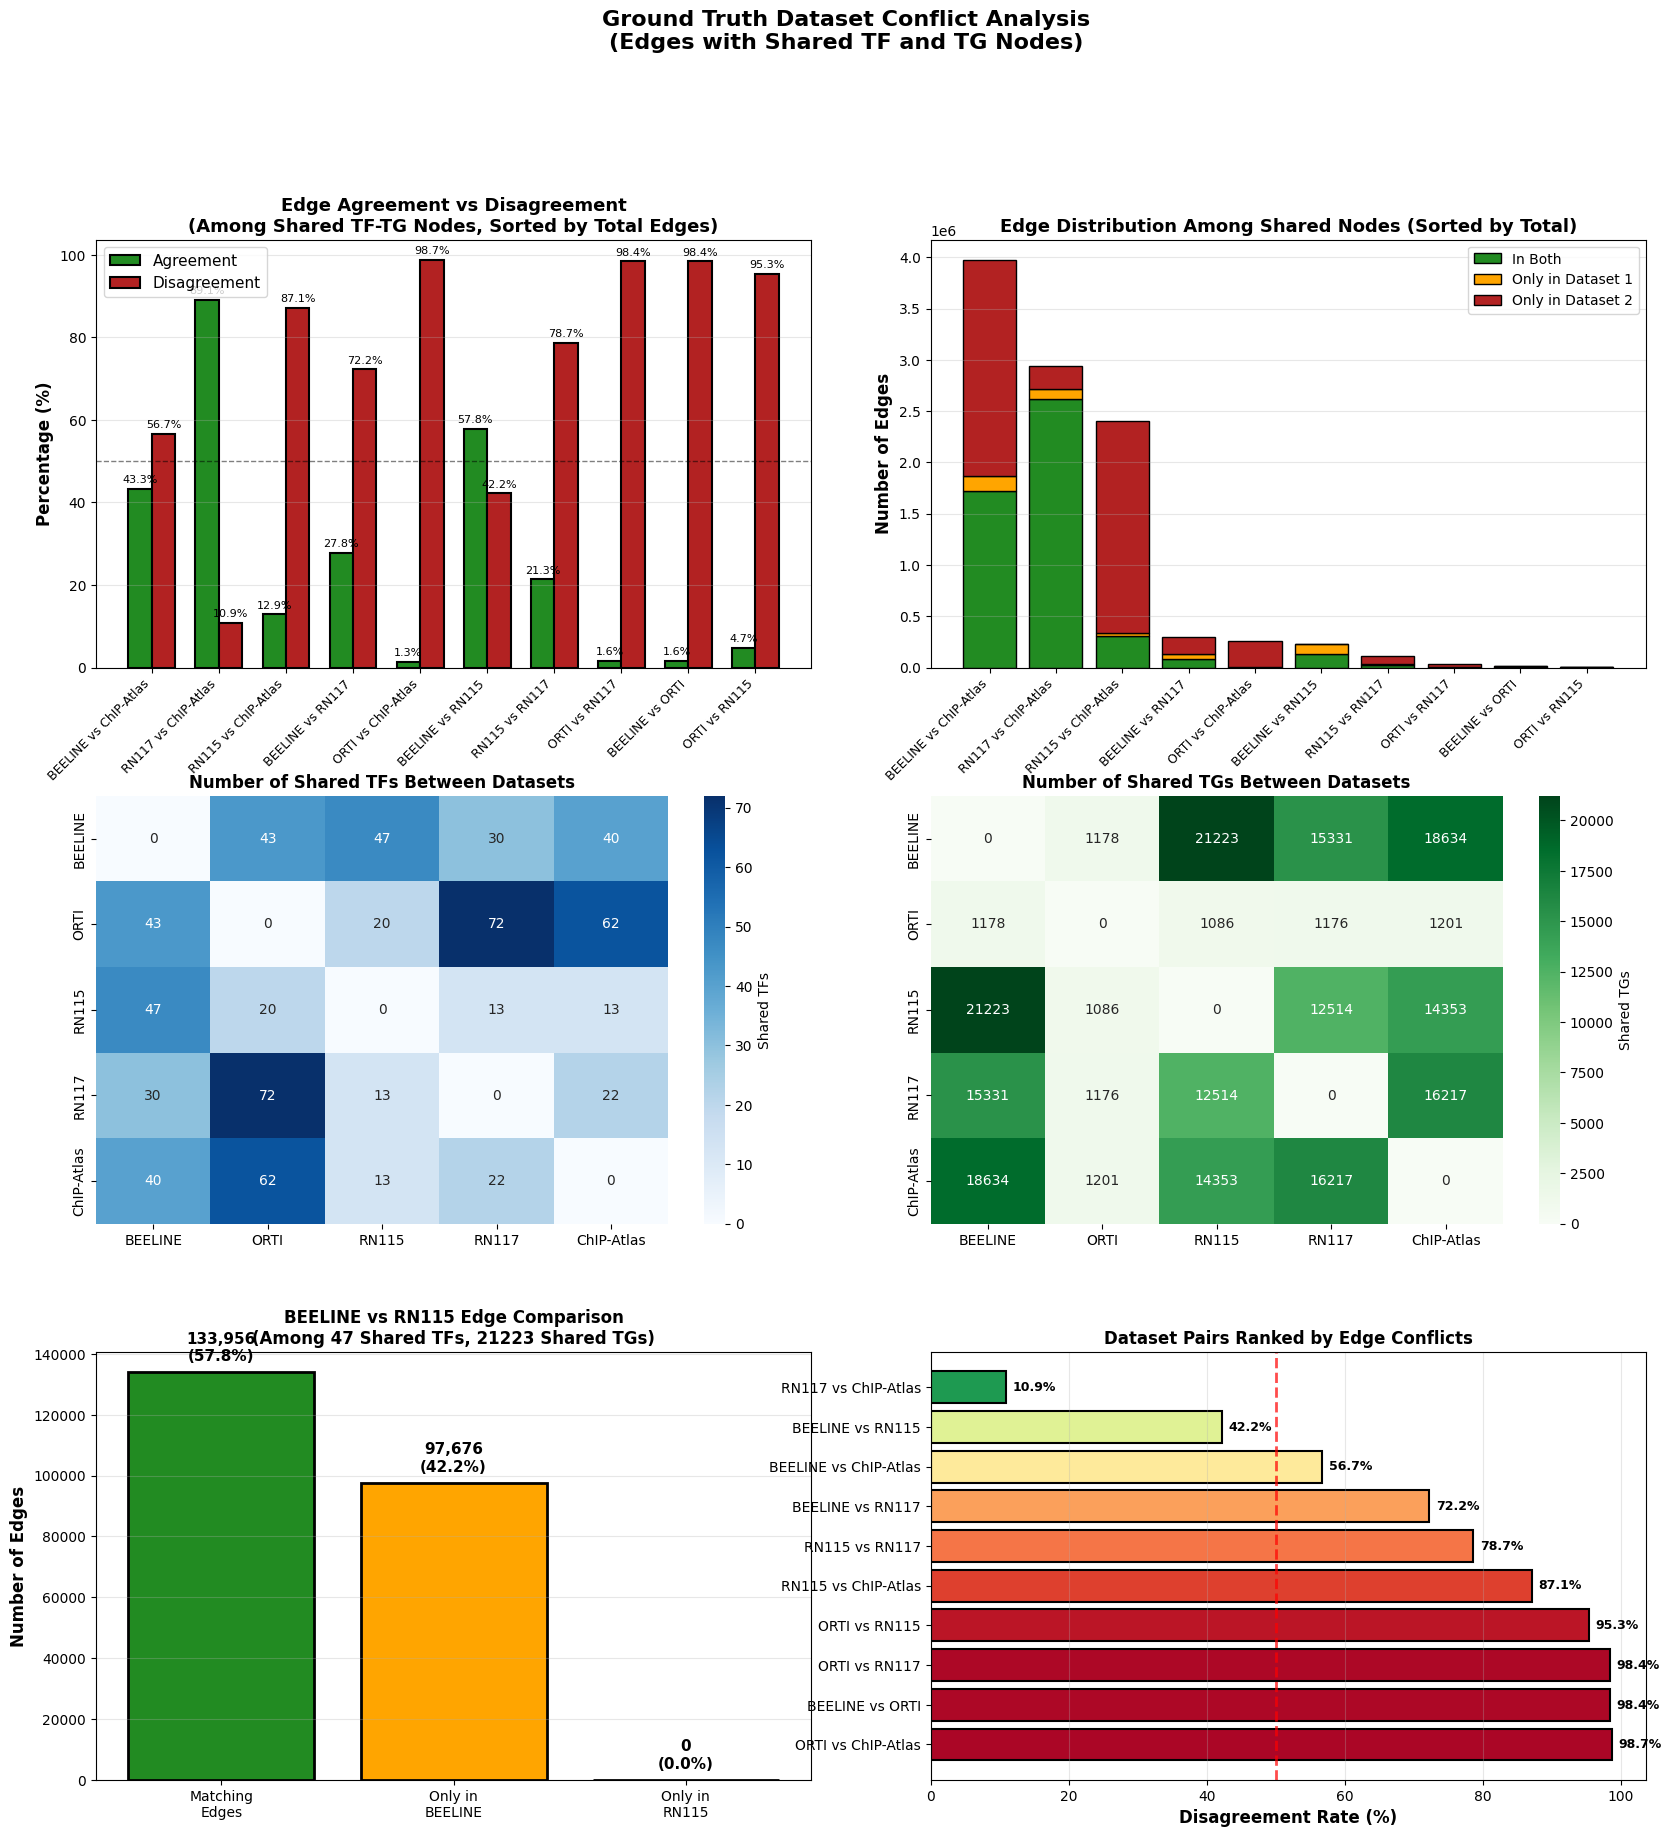


CONFLICT ANALYSIS SUMMARY

ORTI vs ChIP-Atlas:
  Shared TFs: 62, Shared TGs: 1201
  Total edges (shared nodes): 254,846
  Matching: 3,272 (1.3%)
  Only in ORTI: 806
  Only in ChIP-Atlas: 250,768
  Disagreement rate: 98.7%

BEELINE vs ORTI:
  Shared TFs: 43, Shared TGs: 1178
  Total edges (shared nodes): 12,104
  Matching: 194 (1.6%)
  Only in BEELINE: 11,443
  Only in ORTI: 467
  Disagreement rate: 98.4%

ORTI vs RN117:
  Shared TFs: 72, Shared TGs: 1176
  Total edges (shared nodes): 33,988
  Matching: 545 (1.6%)
  Only in ORTI: 800
  Only in RN117: 32,643
  Disagreement rate: 98.4%

ORTI vs RN115:
  Shared TFs: 20, Shared TGs: 1086
  Total edges (shared nodes): 5,857
  Matching: 273 (4.7%)
  Only in ORTI: 140
  Only in RN115: 5,444
  Disagreement rate: 95.3%

RN115 vs ChIP-Atlas:
  Shared TFs: 13, Shared TGs: 14353
  Total edges (shared nodes): 2,403,416
  Matching: 309,443 (12.9%)
  Only in RN115: 22,754
  Only in ChIP-Atlas: 2,071,219
  Disagreement rate: 87.1%

RN115 vs RN117:
  S

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate statistics for all dataset pairs
def calculate_conflict_stats(df1, df2, name1, name2):
    """Calculate edge conflicts between two ground truth datasets"""
    shared_tfs = set(df1["TF"].str.upper()).intersection(set(df2["TF"].str.upper()))
    shared_tgs = set(df1["TG"].str.upper()).intersection(set(df2["TG"].str.upper()))
    
    # Merge on shared nodes only
    df1_filtered = df1[(df1["TF"].str.upper().isin(shared_tfs)) & 
                       (df1["TG"].str.upper().isin(shared_tgs))].copy()
    df2_filtered = df2[(df2["TF"].str.upper().isin(shared_tfs)) & 
                       (df2["TG"].str.upper().isin(shared_tgs))].copy()
    
    merged = pd.merge(df1_filtered, df2_filtered, on=["TF", "TG"], 
                     how="outer", indicator=True)
    
    n_both = len(merged[merged["_merge"] == "both"])
    n_only1 = len(merged[merged["_merge"] == "left_only"])
    n_only2 = len(merged[merged["_merge"] == "right_only"])
    total = len(merged)
    
    return {
        'name1': name1,
        'name2': name2,
        'shared_tfs': len(shared_tfs),
        'shared_tgs': len(shared_tgs),
        'matching': n_both,
        'only1': n_only1,
        'only2': n_only2,
        'total': total,
        'disagreement_rate': (n_only1 + n_only2) / total * 100 if total > 0 else 0,
        'agreement_rate': n_both / total * 100 if total > 0 else 0
    }

# Calculate for all pairs
dataset_dfs = {
    'BEELINE': beeline_df,
    'ORTI': orti_df,
    'RN115': rn115_df,
    'RN117': rn117_df,
    'ChIP-Atlas': chip_atlas_df
}
dataset_names = list(dataset_dfs.keys())

conflict_stats = []
for i, name1 in enumerate(dataset_names):
    for j, name2 in enumerate(dataset_names):
        if i < j:  # Only do each pair once
            stats = calculate_conflict_stats(
                dataset_dfs[name1], dataset_dfs[name2], name1, name2
            )
            conflict_stats.append(stats)
            
# Sort conflict_stats by total edges (descending) before plotting
conflict_stats_sorted = sorted(conflict_stats, key=lambda x: x['total'], reverse=True)

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 20))
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.4)

# 1. Agreement vs Disagreement rates for all pairs (SORTED)
ax1 = fig.add_subplot(gs[0, :2])
pair_labels = [f"{s['name1']} vs {s['name2']}" for s in conflict_stats_sorted]
agreement_rates = [s['agreement_rate'] for s in conflict_stats_sorted]
disagreement_rates = [s['disagreement_rate'] for s in conflict_stats_sorted]

x = np.arange(len(pair_labels))
width = 0.35

bars1 = ax1.bar(x - width/2, agreement_rates, width, label='Agreement', 
                color='forestgreen', edgecolor='black', linewidth=1.5)
bars2 = ax1.bar(x + width/2, disagreement_rates, width, label='Disagreement', 
                color='firebrick', edgecolor='black', linewidth=1.5)

ax1.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax1.set_title('Edge Agreement vs Disagreement\n(Among Shared TF-TG Nodes, Sorted by Total Edges)', 
              fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(pair_labels, rotation=45, ha='right', fontsize=9)
ax1.legend(fontsize=11)
ax1.grid(axis='y', alpha=0.3)
ax1.axhline(y=50, color='black', linestyle='--', linewidth=1, alpha=0.5)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

# 2. Stacked bar showing edge breakdown (SORTED)
ax2 = fig.add_subplot(gs[0, 2:])
matching = [s['matching'] for s in conflict_stats_sorted]
only1 = [s['only1'] for s in conflict_stats_sorted]
only2 = [s['only2'] for s in conflict_stats_sorted]

ax2.bar(x, matching, label='In Both', color='forestgreen', edgecolor='black', linewidth=1)
ax2.bar(x, only1, bottom=matching, label='Only in Dataset 1', 
        color='orange', edgecolor='black', linewidth=1)
ax2.bar(x, only2, bottom=np.array(matching)+np.array(only1), 
        label='Only in Dataset 2', color='firebrick', edgecolor='black', linewidth=1)

ax2.set_ylabel('Number of Edges', fontsize=12, fontweight='bold')
ax2.set_title('Edge Distribution Among Shared Nodes (Sorted by Total)', fontsize=13, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(pair_labels, rotation=45, ha='right', fontsize=9)
ax2.legend(fontsize=10)
ax2.grid(axis='y', alpha=0.3)

# 3. Shared nodes heatmap
ax3 = fig.add_subplot(gs[1, :2])
shared_tf_matrix = np.zeros((len(dataset_names), len(dataset_names)))
for stats in conflict_stats:
    i = dataset_names.index(stats['name1'])
    j = dataset_names.index(stats['name2'])
    shared_tf_matrix[i, j] = stats['shared_tfs']
    shared_tf_matrix[j, i] = stats['shared_tfs']

sns.heatmap(shared_tf_matrix, annot=True, fmt='.0f', cmap='Blues',
            xticklabels=dataset_names, yticklabels=dataset_names,
            cbar_kws={'label': 'Shared TFs'}, ax=ax3)
ax3.set_title('Number of Shared TFs Between Datasets', fontsize=12, fontweight='bold')

# 4. Shared TGs heatmap
ax4 = fig.add_subplot(gs[1, 2:])
shared_tg_matrix = np.zeros((len(dataset_names), len(dataset_names)))
for stats in conflict_stats:
    i = dataset_names.index(stats['name1'])
    j = dataset_names.index(stats['name2'])
    shared_tg_matrix[i, j] = stats['shared_tgs']
    shared_tg_matrix[j, i] = stats['shared_tgs']

sns.heatmap(shared_tg_matrix, annot=True, fmt='.0f', cmap='Greens',
            xticklabels=dataset_names, yticklabels=dataset_names,
            cbar_kws={'label': 'Shared TGs'}, ax=ax4)
ax4.set_title('Number of Shared TGs Between Datasets', fontsize=12, fontweight='bold')

# 5. Detailed breakdown for one example pair (e.g., BEELINE vs RN115)
ax5 = fig.add_subplot(gs[2, :2])

# Get BEELINE vs RN115 stats
beeline_rn115_stats = calculate_conflict_stats(beeline_df, rn115_df, 'BEELINE', 'RN115')

categories = ['Matching\nEdges', 'Only in\nBEELINE', 'Only in\nRN115']
values = [beeline_rn115_stats['matching'], 
          beeline_rn115_stats['only1'], 
          beeline_rn115_stats['only2']]
colors_detail = ['forestgreen', 'orange', 'firebrick']

bars = ax5.bar(categories, values, color=colors_detail, edgecolor='black', linewidth=2)
ax5.set_ylabel('Number of Edges', fontsize=12, fontweight='bold')
ax5.set_title(f'BEELINE vs RN115 Edge Comparison\n(Among {beeline_rn115_stats["shared_tfs"]} Shared TFs, {beeline_rn115_stats["shared_tgs"]} Shared TGs)', 
              fontsize=12, fontweight='bold')
ax5.grid(axis='y', alpha=0.3)

# Add value and percentage labels
for bar, val in zip(bars, values):
    height = bar.get_height()
    pct = val / beeline_rn115_stats['total'] * 100
    ax5.text(bar.get_x() + bar.get_width()/2., height + max(values)*0.02,
            f'{val:,}\n({pct:.1f}%)', ha='center', va='bottom', 
            fontsize=11, fontweight='bold')

# 6. Disagreement rate ranking
ax6 = fig.add_subplot(gs[2, 2:])
sorted_stats = sorted(conflict_stats, key=lambda x: x['disagreement_rate'], reverse=True)
pair_names = [f"{s['name1']} vs {s['name2']}" for s in sorted_stats]
disagreement_sorted = [s['disagreement_rate'] for s in sorted_stats]

bars = ax6.barh(pair_names, disagreement_sorted, 
                color=plt.cm.RdYlGn_r(np.array(disagreement_sorted)/100),
                edgecolor='black', linewidth=1.5)
ax6.set_xlabel('Disagreement Rate (%)', fontsize=12, fontweight='bold')
ax6.set_title('Dataset Pairs Ranked by Edge Conflicts', fontsize=12, fontweight='bold')
ax6.grid(axis='x', alpha=0.3)
ax6.axvline(x=50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='50%')

# Add percentage labels
for i, (bar, val) in enumerate(zip(bars, disagreement_sorted)):
    ax6.text(val + 1, bar.get_y() + bar.get_height()/2., 
            f'{val:.1f}%', va='center', fontsize=9, fontweight='bold')

plt.suptitle('Ground Truth Dataset Conflict Analysis\n(Edges with Shared TF and TG Nodes)', 
             fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "="*80)
print("CONFLICT ANALYSIS SUMMARY")
print("="*80)
for stats in sorted(conflict_stats, key=lambda x: x['disagreement_rate'], reverse=True):
    print(f"\n{stats['name1']} vs {stats['name2']}:")
    print(f"  Shared TFs: {stats['shared_tfs']}, Shared TGs: {stats['shared_tgs']}")
    print(f"  Total edges (shared nodes): {stats['total']:,}")
    print(f"  Matching: {stats['matching']:,} ({stats['agreement_rate']:.1f}%)")
    print(f"  Only in {stats['name1']}: {stats['only1']:,}")
    print(f"  Only in {stats['name2']}: {stats['only2']:,}")
    print(f"  Disagreement rate: {stats['disagreement_rate']:.1f}%")

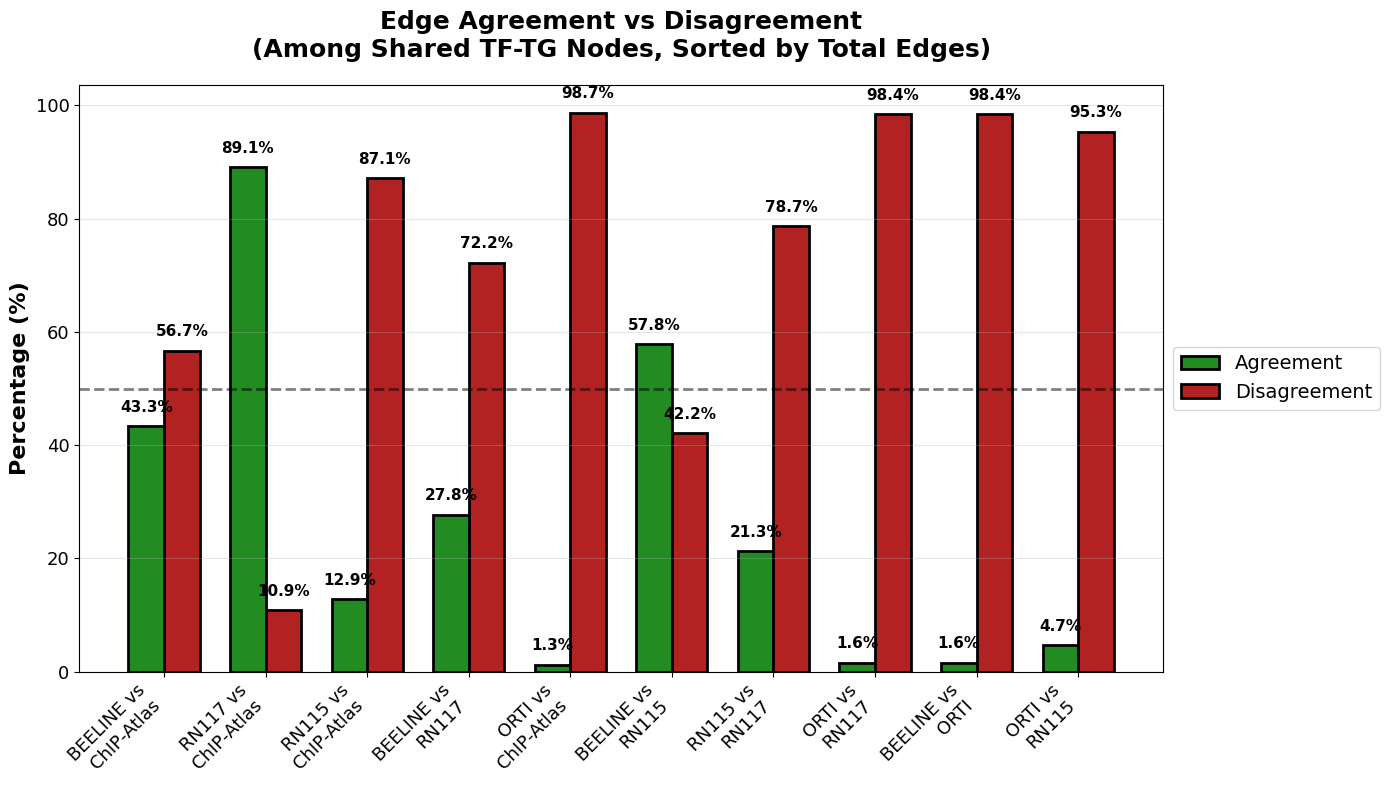

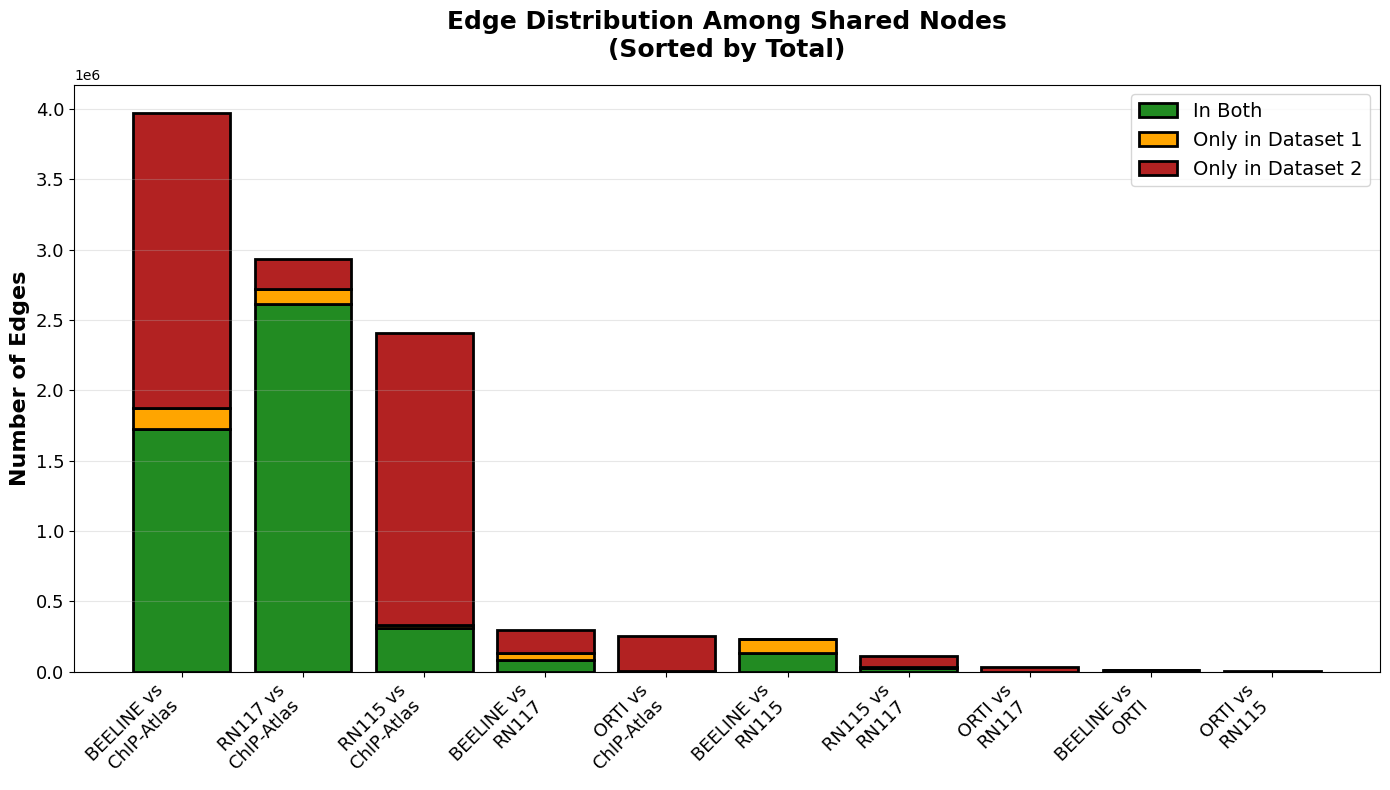

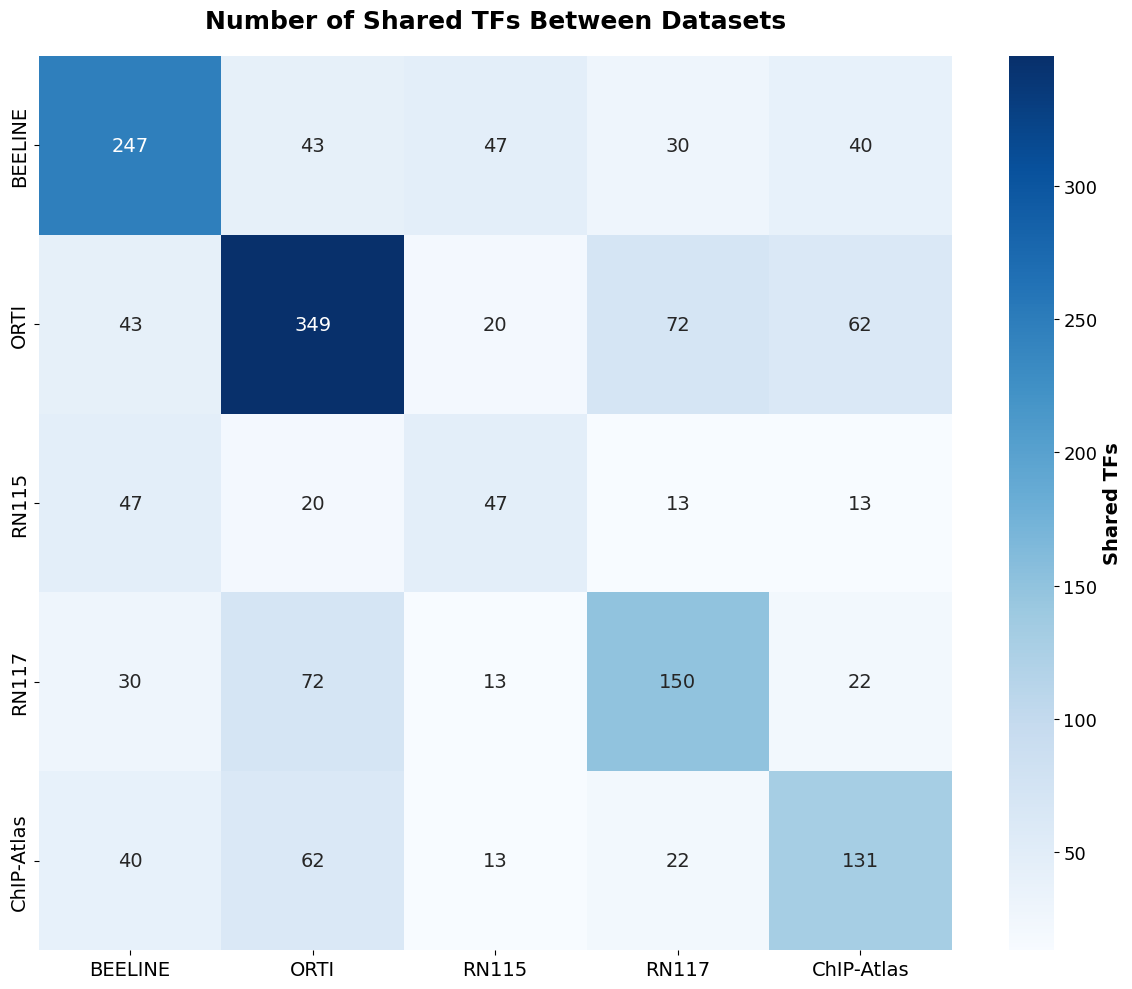

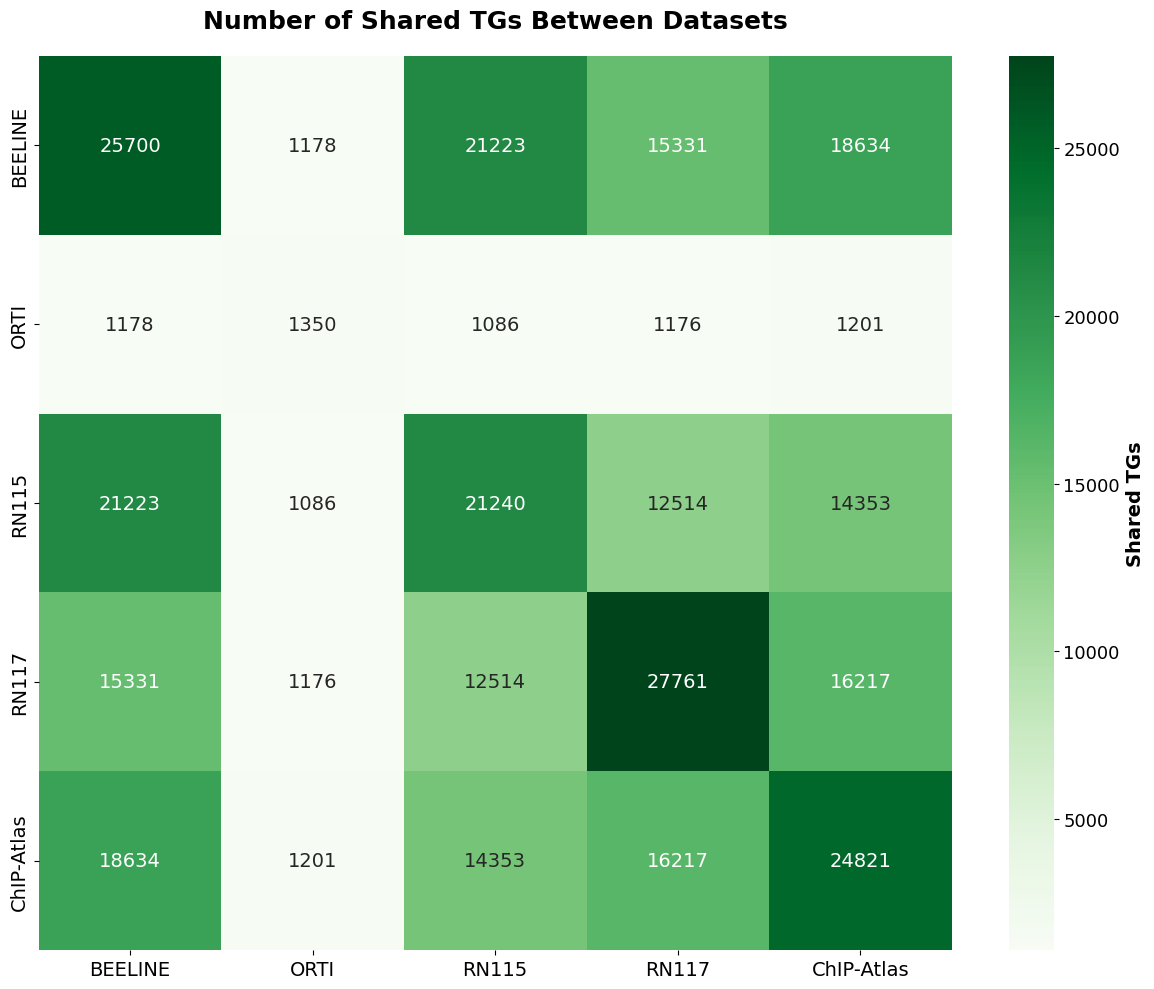

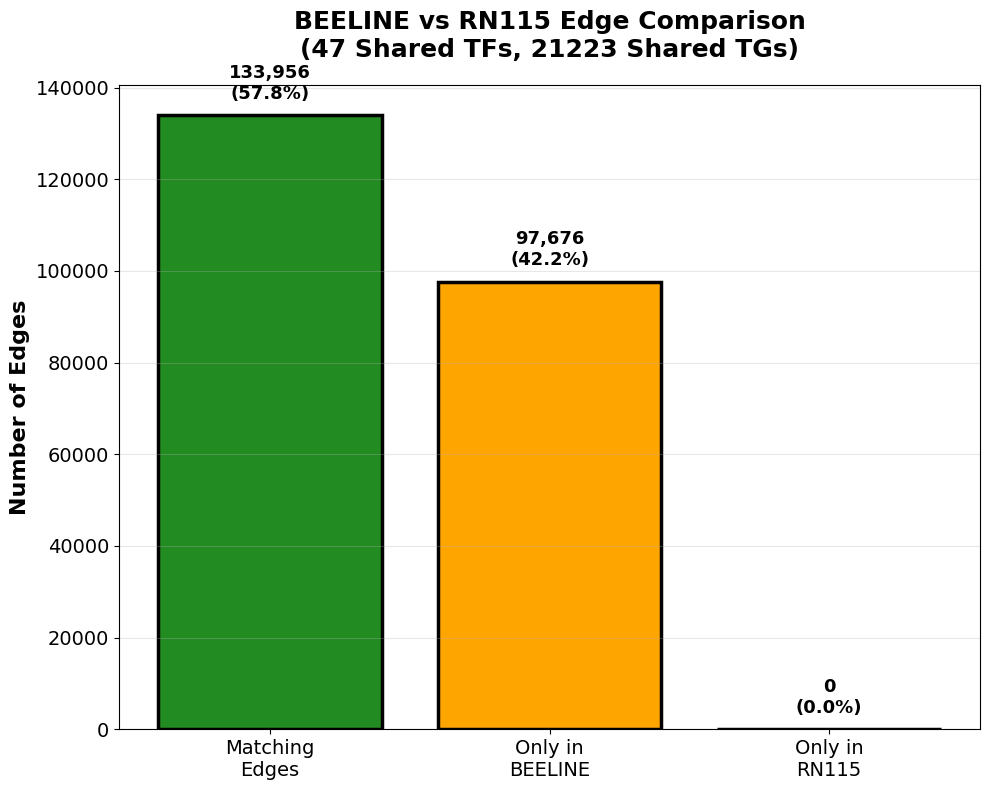

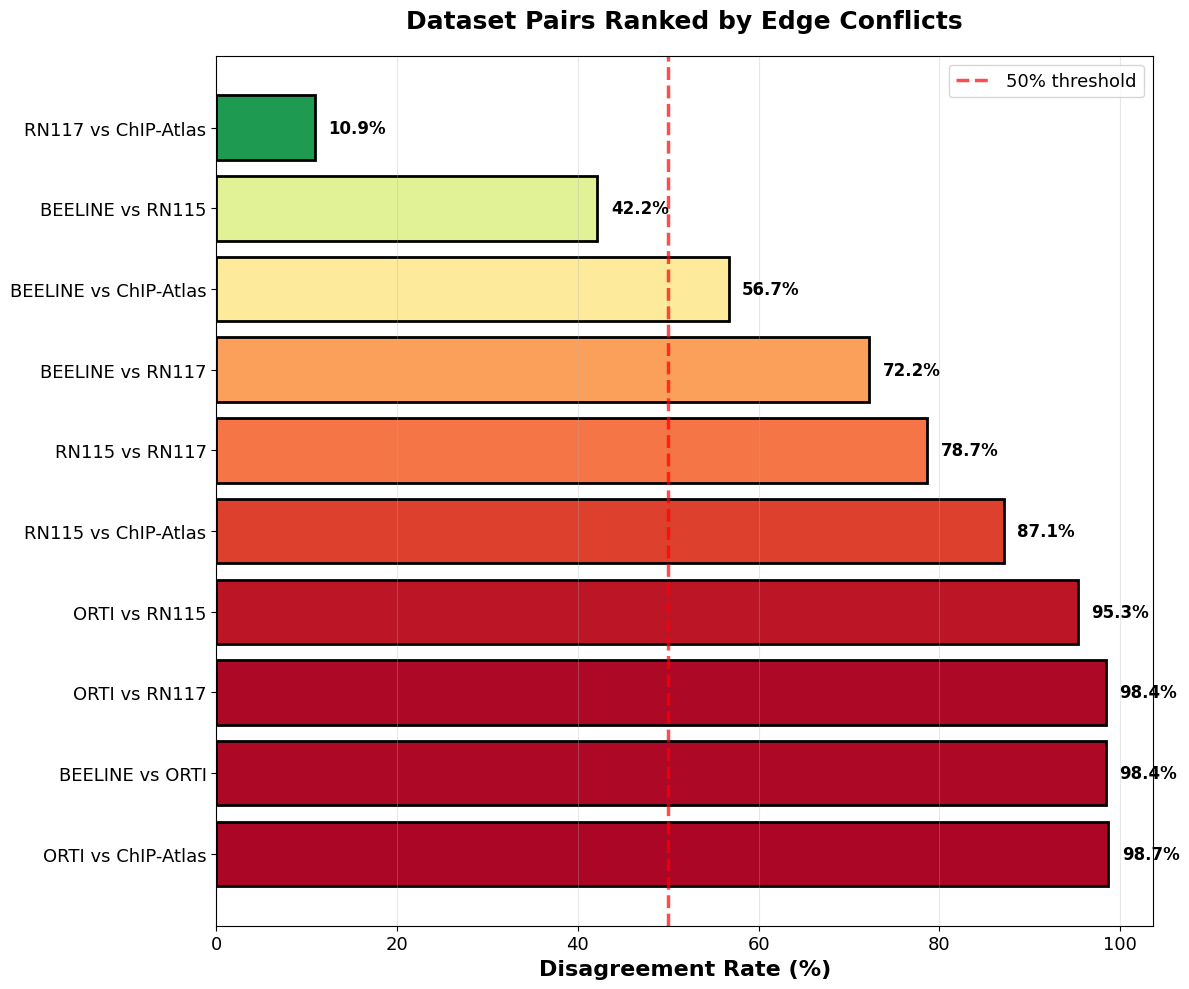


CONFLICT ANALYSIS SUMMARY

ORTI vs ChIP-Atlas:
  Shared TFs: 62, Shared TGs: 1201
  Total edges (shared nodes): 254,846
  Matching: 3,272 (1.3%)
  Only in ORTI: 806
  Only in ChIP-Atlas: 250,768
  Disagreement rate: 98.7%

BEELINE vs ORTI:
  Shared TFs: 43, Shared TGs: 1178
  Total edges (shared nodes): 12,104
  Matching: 194 (1.6%)
  Only in BEELINE: 11,443
  Only in ORTI: 467
  Disagreement rate: 98.4%

ORTI vs RN117:
  Shared TFs: 72, Shared TGs: 1176
  Total edges (shared nodes): 33,988
  Matching: 545 (1.6%)
  Only in ORTI: 800
  Only in RN117: 32,643
  Disagreement rate: 98.4%

ORTI vs RN115:
  Shared TFs: 20, Shared TGs: 1086
  Total edges (shared nodes): 5,857
  Matching: 273 (4.7%)
  Only in ORTI: 140
  Only in RN115: 5,444
  Disagreement rate: 95.3%

RN115 vs ChIP-Atlas:
  Shared TFs: 13, Shared TGs: 14353
  Total edges (shared nodes): 2,403,416
  Matching: 309,443 (12.9%)
  Only in RN115: 22,754
  Only in ChIP-Atlas: 2,071,219
  Disagreement rate: 87.1%

RN115 vs RN117:
  S

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate statistics for all dataset pairs
def calculate_conflict_stats(df1, df2, name1, name2):
    """Calculate edge conflicts between two ground truth datasets"""
    shared_tfs = set(df1["TF"].str.upper()).intersection(set(df2["TF"].str.upper()))
    shared_tgs = set(df1["TG"].str.upper()).intersection(set(df2["TG"].str.upper()))
    
    # Merge on shared nodes only
    df1_filtered = df1[(df1["TF"].str.upper().isin(shared_tfs)) & 
                       (df1["TG"].str.upper().isin(shared_tgs))].copy()
    df2_filtered = df2[(df2["TF"].str.upper().isin(shared_tfs)) & 
                       (df2["TG"].str.upper().isin(shared_tgs))].copy()
    
    merged = pd.merge(df1_filtered, df2_filtered, on=["TF", "TG"], 
                     how="outer", indicator=True)
    
    n_both = len(merged[merged["_merge"] == "both"])
    n_only1 = len(merged[merged["_merge"] == "left_only"])
    n_only2 = len(merged[merged["_merge"] == "right_only"])
    total = len(merged)
    
    return {
        'name1': name1,
        'name2': name2,
        'shared_tfs': len(shared_tfs),
        'shared_tgs': len(shared_tgs),
        'matching': n_both,
        'only1': n_only1,
        'only2': n_only2,
        'total': total,
        'disagreement_rate': (n_only1 + n_only2) / total * 100 if total > 0 else 0,
        'agreement_rate': n_both / total * 100 if total > 0 else 0
    }

# Calculate for all pairs
dataset_dfs = {
    'BEELINE': beeline_df,
    'ORTI': orti_df,
    'RN115': rn115_df,
    'RN117': rn117_df,
    'ChIP-Atlas': chip_atlas_df
}
dataset_names = list(dataset_dfs.keys())

conflict_stats = []
for i, name1 in enumerate(dataset_names):
    for j, name2 in enumerate(dataset_names):
        if i < j:  # Only do each pair once
            stats = calculate_conflict_stats(
                dataset_dfs[name1], dataset_dfs[name2], name1, name2
            )
            conflict_stats.append(stats)

# Sort conflict_stats by total edges (descending)
conflict_stats_sorted = sorted(conflict_stats, key=lambda x: x['total'], reverse=True)

# ============================================================================
# FIGURE 1: Agreement vs Disagreement
# ============================================================================
fig1, ax1 = plt.subplots(figsize=(14, 8))
pair_labels = [f"{s['name1']} vs\n{s['name2']}" for s in conflict_stats_sorted]
agreement_rates = [s['agreement_rate'] for s in conflict_stats_sorted]
disagreement_rates = [s['disagreement_rate'] for s in conflict_stats_sorted]

x = np.arange(len(pair_labels))
width = 0.35

bars1 = ax1.bar(x - width/2, agreement_rates, width, label='Agreement', 
                color='forestgreen', edgecolor='black', linewidth=2)
bars2 = ax1.bar(x + width/2, disagreement_rates, width, label='Disagreement', 
                color='firebrick', edgecolor='black', linewidth=2)

ax1.set_ylabel('Percentage (%)', fontsize=16, fontweight='bold')
ax1.set_title('Edge Agreement vs Disagreement\n(Among Shared TF-TG Nodes, Sorted by Total Edges)', 
              fontsize=18, fontweight='bold', pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(pair_labels, rotation=45, ha='right', fontsize=13)
ax1.tick_params(axis='y', labelsize=13)
ax1.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
ax1.grid(axis='y', alpha=0.3)
ax1.axhline(y=50, color='black', linestyle='--', linewidth=2, alpha=0.5)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# FIGURE 2: Stacked Edge Distribution
# ============================================================================
fig2, ax2 = plt.subplots(figsize=(14, 8))
matching = [s['matching'] for s in conflict_stats_sorted]
only1 = [s['only1'] for s in conflict_stats_sorted]
only2 = [s['only2'] for s in conflict_stats_sorted]

ax2.bar(x, matching, label='In Both', color='forestgreen', edgecolor='black', linewidth=2)
ax2.bar(x, only1, bottom=matching, label='Only in Dataset 1', 
        color='orange', edgecolor='black', linewidth=2)
ax2.bar(x, only2, bottom=np.array(matching)+np.array(only1), 
        label='Only in Dataset 2', color='firebrick', edgecolor='black', linewidth=2)

ax2.set_ylabel('Number of Edges', fontsize=16, fontweight='bold')
ax2.set_title('Edge Distribution Among Shared Nodes\n(Sorted by Total)', 
              fontsize=18, fontweight='bold', pad=20)
ax2.set_xticks(x)
ax2.set_xticklabels(pair_labels, rotation=45, ha='right', fontsize=13)
ax2.tick_params(axis='y', labelsize=13)
ax2.legend(fontsize=14, loc='upper right')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# FIGURE 3: Shared TFs Heatmap
# ============================================================================
fig3, ax3 = plt.subplots(figsize=(12, 10))
shared_tf_matrix = np.zeros((len(dataset_names), len(dataset_names)))

# Fill diagonal
for i, name in enumerate(dataset_names):
    shared_tf_matrix[i, i] = len(set(dataset_dfs[name]["TF"].str.upper()))

# Fill off-diagonal
for stats in conflict_stats:
    i = dataset_names.index(stats['name1'])
    j = dataset_names.index(stats['name2'])
    shared_tf_matrix[i, j] = stats['shared_tfs']
    shared_tf_matrix[j, i] = stats['shared_tfs']

sns.heatmap(shared_tf_matrix, annot=True, fmt='.0f', cmap='Blues',
            xticklabels=dataset_names, yticklabels=dataset_names,
            cbar_kws={'label': 'Shared TFs'}, ax=ax3, annot_kws={'fontsize': 14})
ax3.set_title('Number of Shared TFs Between Datasets', 
              fontsize=18, fontweight='bold', pad=20)
ax3.tick_params(axis='both', labelsize=14)
cbar = ax3.collections[0].colorbar
cbar.ax.tick_params(labelsize=13)
cbar.set_label('Shared TFs', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# FIGURE 4: Shared TGs Heatmap
# ============================================================================
fig4, ax4 = plt.subplots(figsize=(12, 10))
shared_tg_matrix = np.zeros((len(dataset_names), len(dataset_names)))

# Fill diagonal
for i, name in enumerate(dataset_names):
    shared_tg_matrix[i, i] = len(set(dataset_dfs[name]["TG"].str.upper()))

# Fill off-diagonal
for stats in conflict_stats:
    i = dataset_names.index(stats['name1'])
    j = dataset_names.index(stats['name2'])
    shared_tg_matrix[i, j] = stats['shared_tgs']
    shared_tg_matrix[j, i] = stats['shared_tgs']

sns.heatmap(shared_tg_matrix, annot=True, fmt='.0f', cmap='Greens',
            xticklabels=dataset_names, yticklabels=dataset_names,
            cbar_kws={'label': 'Shared TGs'}, ax=ax4, annot_kws={'fontsize': 14})
ax4.set_title('Number of Shared TGs Between Datasets', 
              fontsize=18, fontweight='bold', pad=20)
ax4.tick_params(axis='both', labelsize=14)
cbar = ax4.collections[0].colorbar
cbar.ax.tick_params(labelsize=13)
cbar.set_label('Shared TGs', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# FIGURE 5: Detailed BEELINE vs RN115 Comparison
# ============================================================================
fig5, ax5 = plt.subplots(figsize=(10, 8))

beeline_rn115_stats = calculate_conflict_stats(beeline_df, rn115_df, 'BEELINE', 'RN115')

categories = ['Matching\nEdges', 'Only in\nBEELINE', 'Only in\nRN115']
values = [beeline_rn115_stats['matching'], 
          beeline_rn115_stats['only1'], 
          beeline_rn115_stats['only2']]
colors_detail = ['forestgreen', 'orange', 'firebrick']

bars = ax5.bar(categories, values, color=colors_detail, edgecolor='black', linewidth=2.5)
ax5.set_ylabel('Number of Edges', fontsize=16, fontweight='bold')
ax5.set_title(f'BEELINE vs RN115 Edge Comparison\n({beeline_rn115_stats["shared_tfs"]} Shared TFs, {beeline_rn115_stats["shared_tgs"]} Shared TGs)', 
              fontsize=18, fontweight='bold', pad=20)
ax5.tick_params(axis='both', labelsize=14)
ax5.grid(axis='y', alpha=0.3)

# Add value and percentage labels
for bar, val in zip(bars, values):
    height = bar.get_height()
    pct = val / beeline_rn115_stats['total'] * 100
    ax5.text(bar.get_x() + bar.get_width()/2., height + max(values)*0.02,
            f'{val:,}\n({pct:.1f}%)', ha='center', va='bottom', 
            fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# FIGURE 6: Disagreement Rate Ranking
# ============================================================================
fig6, ax6 = plt.subplots(figsize=(12, 10))
sorted_stats = sorted(conflict_stats, key=lambda x: x['disagreement_rate'], reverse=True)
pair_names = [f"{s['name1']} vs {s['name2']}" for s in sorted_stats]
disagreement_sorted = [s['disagreement_rate'] for s in sorted_stats]

bars = ax6.barh(pair_names, disagreement_sorted, 
                color=plt.cm.RdYlGn_r(np.array(disagreement_sorted)/100),
                edgecolor='black', linewidth=2)
ax6.set_xlabel('Disagreement Rate (%)', fontsize=16, fontweight='bold')
ax6.set_title('Dataset Pairs Ranked by Edge Conflicts', 
              fontsize=18, fontweight='bold', pad=20)
ax6.tick_params(axis='both', labelsize=13)
ax6.grid(axis='x', alpha=0.3)
ax6.axvline(x=50, color='red', linestyle='--', linewidth=2.5, alpha=0.7, label='50% threshold')
ax6.legend(fontsize=13)

# Add percentage labels
for i, (bar, val) in enumerate(zip(bars, disagreement_sorted)):
    ax6.text(val + 1.5, bar.get_y() + bar.get_height()/2., 
            f'{val:.1f}%', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "="*80)
print("CONFLICT ANALYSIS SUMMARY")
print("="*80)
for stats in sorted(conflict_stats, key=lambda x: x['disagreement_rate'], reverse=True):
    print(f"\n{stats['name1']} vs {stats['name2']}:")
    print(f"  Shared TFs: {stats['shared_tfs']}, Shared TGs: {stats['shared_tgs']}")
    print(f"  Total edges (shared nodes): {stats['total']:,}")
    print(f"  Matching: {stats['matching']:,} ({stats['agreement_rate']:.1f}%)")
    print(f"  Only in {stats['name1']}: {stats['only1']:,}")
    print(f"  Only in {stats['name2']}: {stats['only2']:,}")
    print(f"  Disagreement rate: {stats['disagreement_rate']:.1f}%")

/tmp/ipykernel_3089509/4045708068.py:139: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


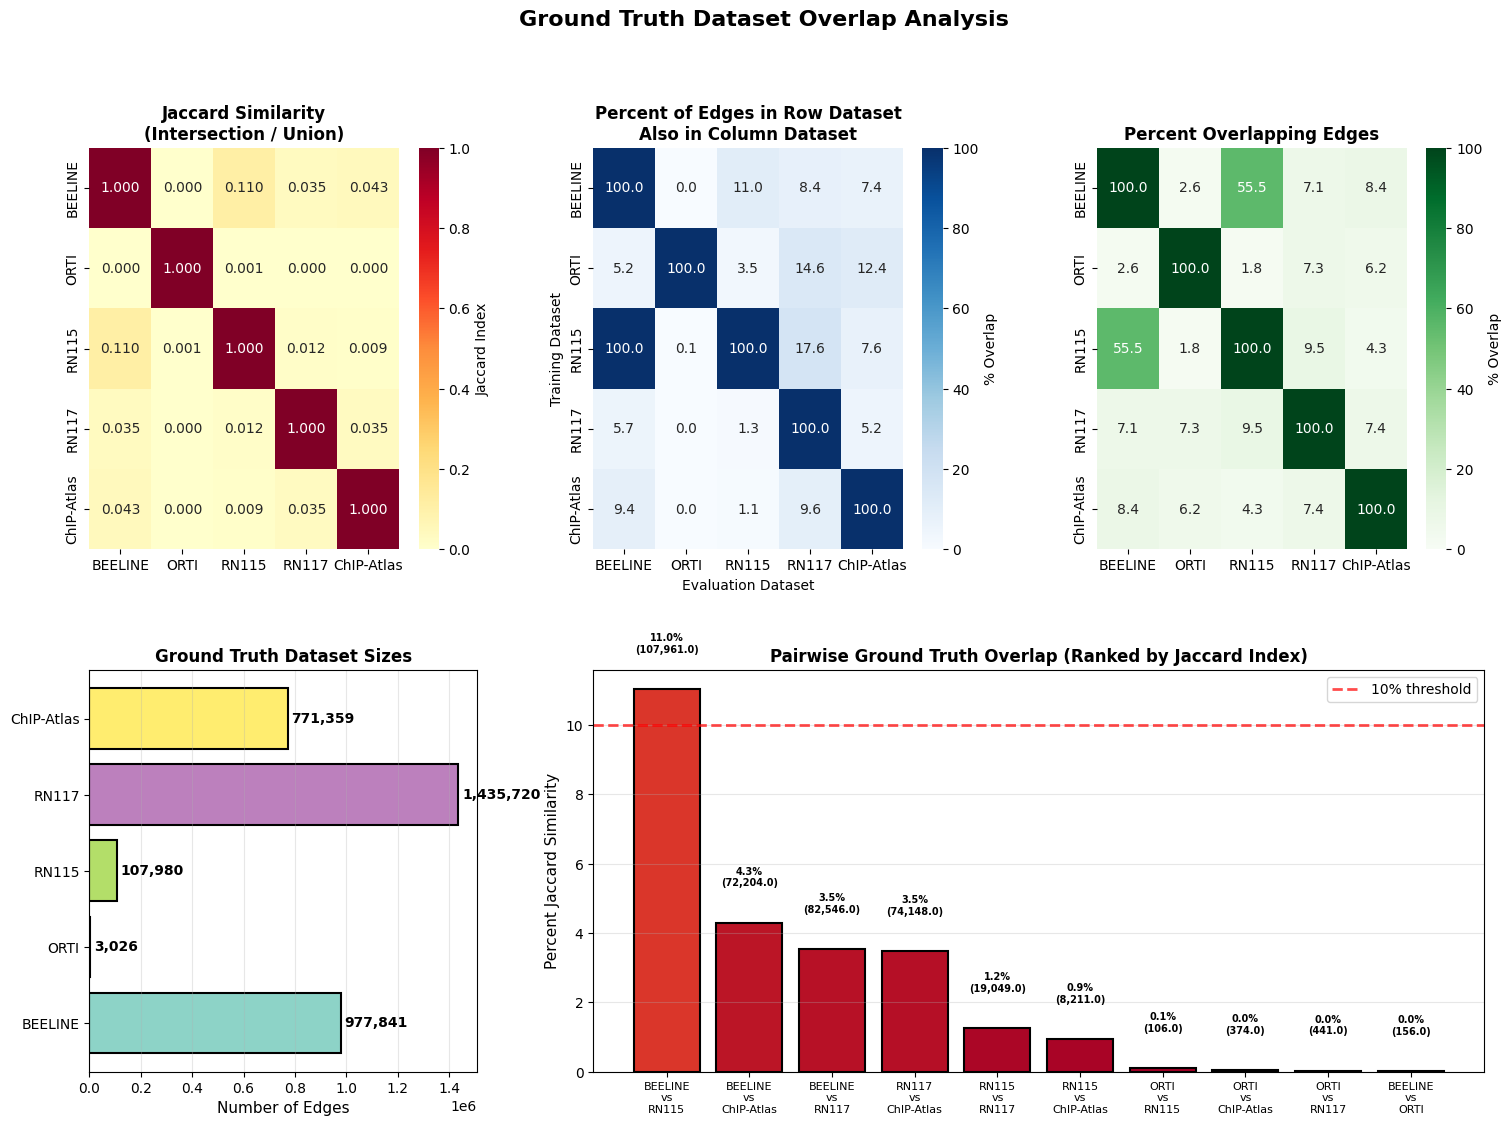


GROUND TRUTH OVERLAP SUMMARY

Dataset Sizes:
  BEELINE        :    977,841 edges
  ORTI           :      3,026 edges
  RN115          :    107,980 edges
  RN117          :  1,435,720 edges
  ChIP-Atlas     :    771,359 edges

--------------------------------------------------------------------------------
Key Findings:
--------------------------------------------------------------------------------

✓ HIGHEST overlap: BEELINE vs RN115 (Jaccard: 11.04%, 107,961.0 edges)
✗ LOWEST overlap:  BEELINE vs ORTI (Jaccard: 0.02%, 156.0 edges)

⚠ 9/10 pairs have <10% Jaccard similarity
  → Training on one dataset and evaluating on another is problematic!



In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle

# Create dataset names and edge sets
datasets = {
    'BEELINE': beeline_edges,
    'ORTI': orti_edges,
    'RN115': rn115_edges,
    'RN117': rn117_edges,
    'ChIP-Atlas': chip_atlas_edges
}

dataset_names = list(datasets.keys())
n = len(dataset_names)

# Compute pairwise overlaps
overlap_matrix = np.zeros((n, n))
jaccard_matrix = np.zeros((n, n))
percent_matrix_row = np.zeros((n, n))  # % of row dataset in col dataset
percent_matrix_col = np.zeros((n, n))  # % of col dataset in row dataset

for i, name1 in enumerate(dataset_names):
    for j, name2 in enumerate(dataset_names):
        set1 = datasets[name1]
        set2 = datasets[name2]
        
        intersection = len(set1.intersection(set2))
        union = len(set1.union(set2))
        
        overlap_matrix[i, j] = intersection
        
        # Jaccard similarity
        jaccard_matrix[i, j] = intersection / union if union > 0 else 0
        
        # Percentage overlaps (asymmetric)
        percent_matrix_row[i, j] = (intersection / len(set1) * 100) if len(set1) > 0 else 0
        percent_matrix_col[i, j] = (intersection / len(set2) * 100) if len(set2) > 0 else 0

# Create figure with multiple subplots
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# 1. Jaccard Similarity Heatmap (symmetric)
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(jaccard_matrix, annot=True, fmt='.3f', cmap='YlOrRd', 
            xticklabels=dataset_names, yticklabels=dataset_names,
            vmin=0, vmax=1, cbar_kws={'label': 'Jaccard Index'}, ax=ax1)
ax1.set_title('Jaccard Similarity\n(Intersection / Union)', fontsize=12, fontweight='bold')
ax1.set_xlabel('')
ax1.set_ylabel('')

# 2. Row-wise percentage overlap (% of row in column)
ax2 = fig.add_subplot(gs[0, 1])
sns.heatmap(percent_matrix_row, annot=True, fmt='.1f', cmap='Blues',
            xticklabels=dataset_names, yticklabels=dataset_names,
            vmin=0, vmax=100, cbar_kws={'label': '% Overlap'}, ax=ax2)
ax2.set_title('Percent of Edges in Row Dataset\nAlso in Column Dataset', 
              fontsize=12, fontweight='bold')
ax2.set_xlabel('Evaluation Dataset', fontsize=10)
ax2.set_ylabel('Training Dataset', fontsize=10)

# 3. Symmetric percentage overlap
ax3 = fig.add_subplot(gs[0, 2])
# Average of both directions for symmetric measure
symmetric_percent = (percent_matrix_row + percent_matrix_col) / 2
sns.heatmap(symmetric_percent, annot=True, fmt='.1f', 
            cmap='Greens', xticklabels=dataset_names, yticklabels=dataset_names,
            vmin=0, vmax=100, cbar_kws={'label': '% Overlap'}, ax=ax3)
ax3.set_title('Percent Overlapping Edges', 
              fontsize=12, fontweight='bold')
ax3.set_xlabel('')
ax3.set_ylabel('')

# 4. Dataset sizes
ax4 = fig.add_subplot(gs[1, 0])
sizes = [len(datasets[name]) for name in dataset_names]
colors = plt.cm.Set3(np.linspace(0, 1, n))
bars = ax4.barh(dataset_names, sizes, color=colors, edgecolor='black', linewidth=1.5)
ax4.set_xlabel('Number of Edges', fontsize=11)
ax4.set_title('Ground Truth Dataset Sizes', fontsize=12, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, size) in enumerate(zip(bars, sizes)):
    ax4.text(size + max(sizes)*0.01, bar.get_y() + bar.get_height()/2, 
             f'{size:,}', va='center', fontsize=10, fontweight='bold')

# 5. Pairwise overlap summary (non-diagonal)
ax5 = fig.add_subplot(gs[1, 1:])
pairwise_overlaps = []
labels = []

for i in range(n):
    for j in range(i+1, n):
        overlap = overlap_matrix[i, j]
        pct1 = percent_matrix_row[i, j]  # % of dataset i in dataset j
        pct2 = percent_matrix_row[j, i]  # % of dataset j in dataset i
        jaccard = jaccard_matrix[i, j]
        
        pairwise_overlaps.append({
            'pair': f'{dataset_names[i]}\nvs\n{dataset_names[j]}',
            'overlap': overlap,
            'pct_forward': pct1,
            'pct_backward': pct2,
            'jaccard': jaccard
        })
        labels.append(f'{dataset_names[i]}→{dataset_names[j]}')

# Sort by Jaccard index
pairwise_overlaps_sorted = sorted(pairwise_overlaps, key=lambda x: x['jaccard'], reverse=True)

x_pos = np.arange(len(pairwise_overlaps_sorted))
jaccards = [p['jaccard'] * 100 for p in pairwise_overlaps_sorted]
pair_labels = [p['pair'] for p in pairwise_overlaps_sorted]

bars = ax5.bar(x_pos, jaccards, color=plt.cm.RdYlGn(np.array(jaccards)/100), 
               edgecolor='black', linewidth=1.5)
ax5.set_xticks(x_pos)
ax5.set_xticklabels(pair_labels, rotation=0, ha='center', fontsize=8)
ax5.set_ylabel('Percent Jaccard Similarity', fontsize=11)
ax5.set_title('Pairwise Ground Truth Overlap (Ranked by Jaccard Index)', 
              fontsize=12, fontweight='bold')
ax5.grid(axis='y', alpha=0.3)
ax5.axhline(y=10, color='red', linestyle='--', linewidth=2, alpha=0.7, label='10% threshold')
ax5.legend()

# Add percentage labels on bars
for i, (bar, p) in enumerate(zip(bars, pairwise_overlaps_sorted)):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{p["jaccard"]*100:.1f}%\n({p["overlap"]:,})',
             ha='center', va='bottom', fontsize=7, fontweight='bold')

plt.suptitle('Ground Truth Dataset Overlap Analysis', 
             fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*80)
print("GROUND TRUTH OVERLAP SUMMARY")
print("="*80)

print("\nDataset Sizes:")
for name in dataset_names:
    print(f"  {name:15s}: {len(datasets[name]):>10,} edges")

print("\n" + "-"*80)
print("Key Findings:")
print("-"*80)

# Find best and worst overlaps
best_overlap = max(pairwise_overlaps_sorted, key=lambda x: x['jaccard'])
worst_overlap = min(pairwise_overlaps_sorted, key=lambda x: x['jaccard'])

print(f"\n✓ HIGHEST overlap: {best_overlap['pair'].replace(chr(10), ' ')} "
      f"(Jaccard: {best_overlap['jaccard']*100:.2f}%, {best_overlap['overlap']:,} edges)")
print(f"✗ LOWEST overlap:  {worst_overlap['pair'].replace(chr(10), ' ')} "
      f"(Jaccard: {worst_overlap['jaccard']*100:.2f}%, {worst_overlap['overlap']:,} edges)")

# Count low overlaps
low_overlap_count = sum(1 for p in pairwise_overlaps_sorted if p['jaccard'] < 0.1)
print(f"\n⚠ {low_overlap_count}/{len(pairwise_overlaps_sorted)} pairs have <10% Jaccard similarity")
print(f"  → Training on one dataset and evaluating on another is problematic!")

print("\n" + "="*80)

Total unique edges across all datasets: 2,982,733

BEELINE vs ORTI:
  AUROC: 0.3617
  TP: 156 | FP: 977,685 | FN: 2,870 | TN: 2,002,022
  Precision: 0.0002 | Recall: 0.0516

BEELINE vs RN115:
  AUROC: 0.8486
  TP: 107,961 | FP: 869,880 | FN: 19 | TN: 2,004,873
  Precision: 0.1104 | Recall: 0.9998

BEELINE vs RN117:
  AUROC: 0.2394
  TP: 82,546 | FP: 895,295 | FN: 1,353,174 | TN: 651,718
  Precision: 0.0844 | Recall: 0.0575

BEELINE vs ChIP-Atlas:
  AUROC: 0.3420
  TP: 72,204 | FP: 905,637 | FN: 699,155 | TN: 1,305,737
  Precision: 0.0738 | Recall: 0.0936

ORTI vs BEELINE:
  AUROC: 0.4994
  TP: 156 | FP: 2,870 | FN: 977,685 | TN: 2,002,022
  Precision: 0.0516 | Recall: 0.0002

ORTI vs RN115:
  AUROC: 0.5000
  TP: 106 | FP: 2,920 | FN: 107,874 | TN: 2,871,833
  Precision: 0.0350 | Recall: 0.0010

ORTI vs RN117:
  AUROC: 0.4993
  TP: 441 | FP: 2,585 | FN: 1,435,279 | TN: 1,544,428
  Precision: 0.1457 | Recall: 0.0003

ORTI vs ChIP-Atlas:
  AUROC: 0.4996
  TP: 374 | FP: 2,652 | FN: 770,985

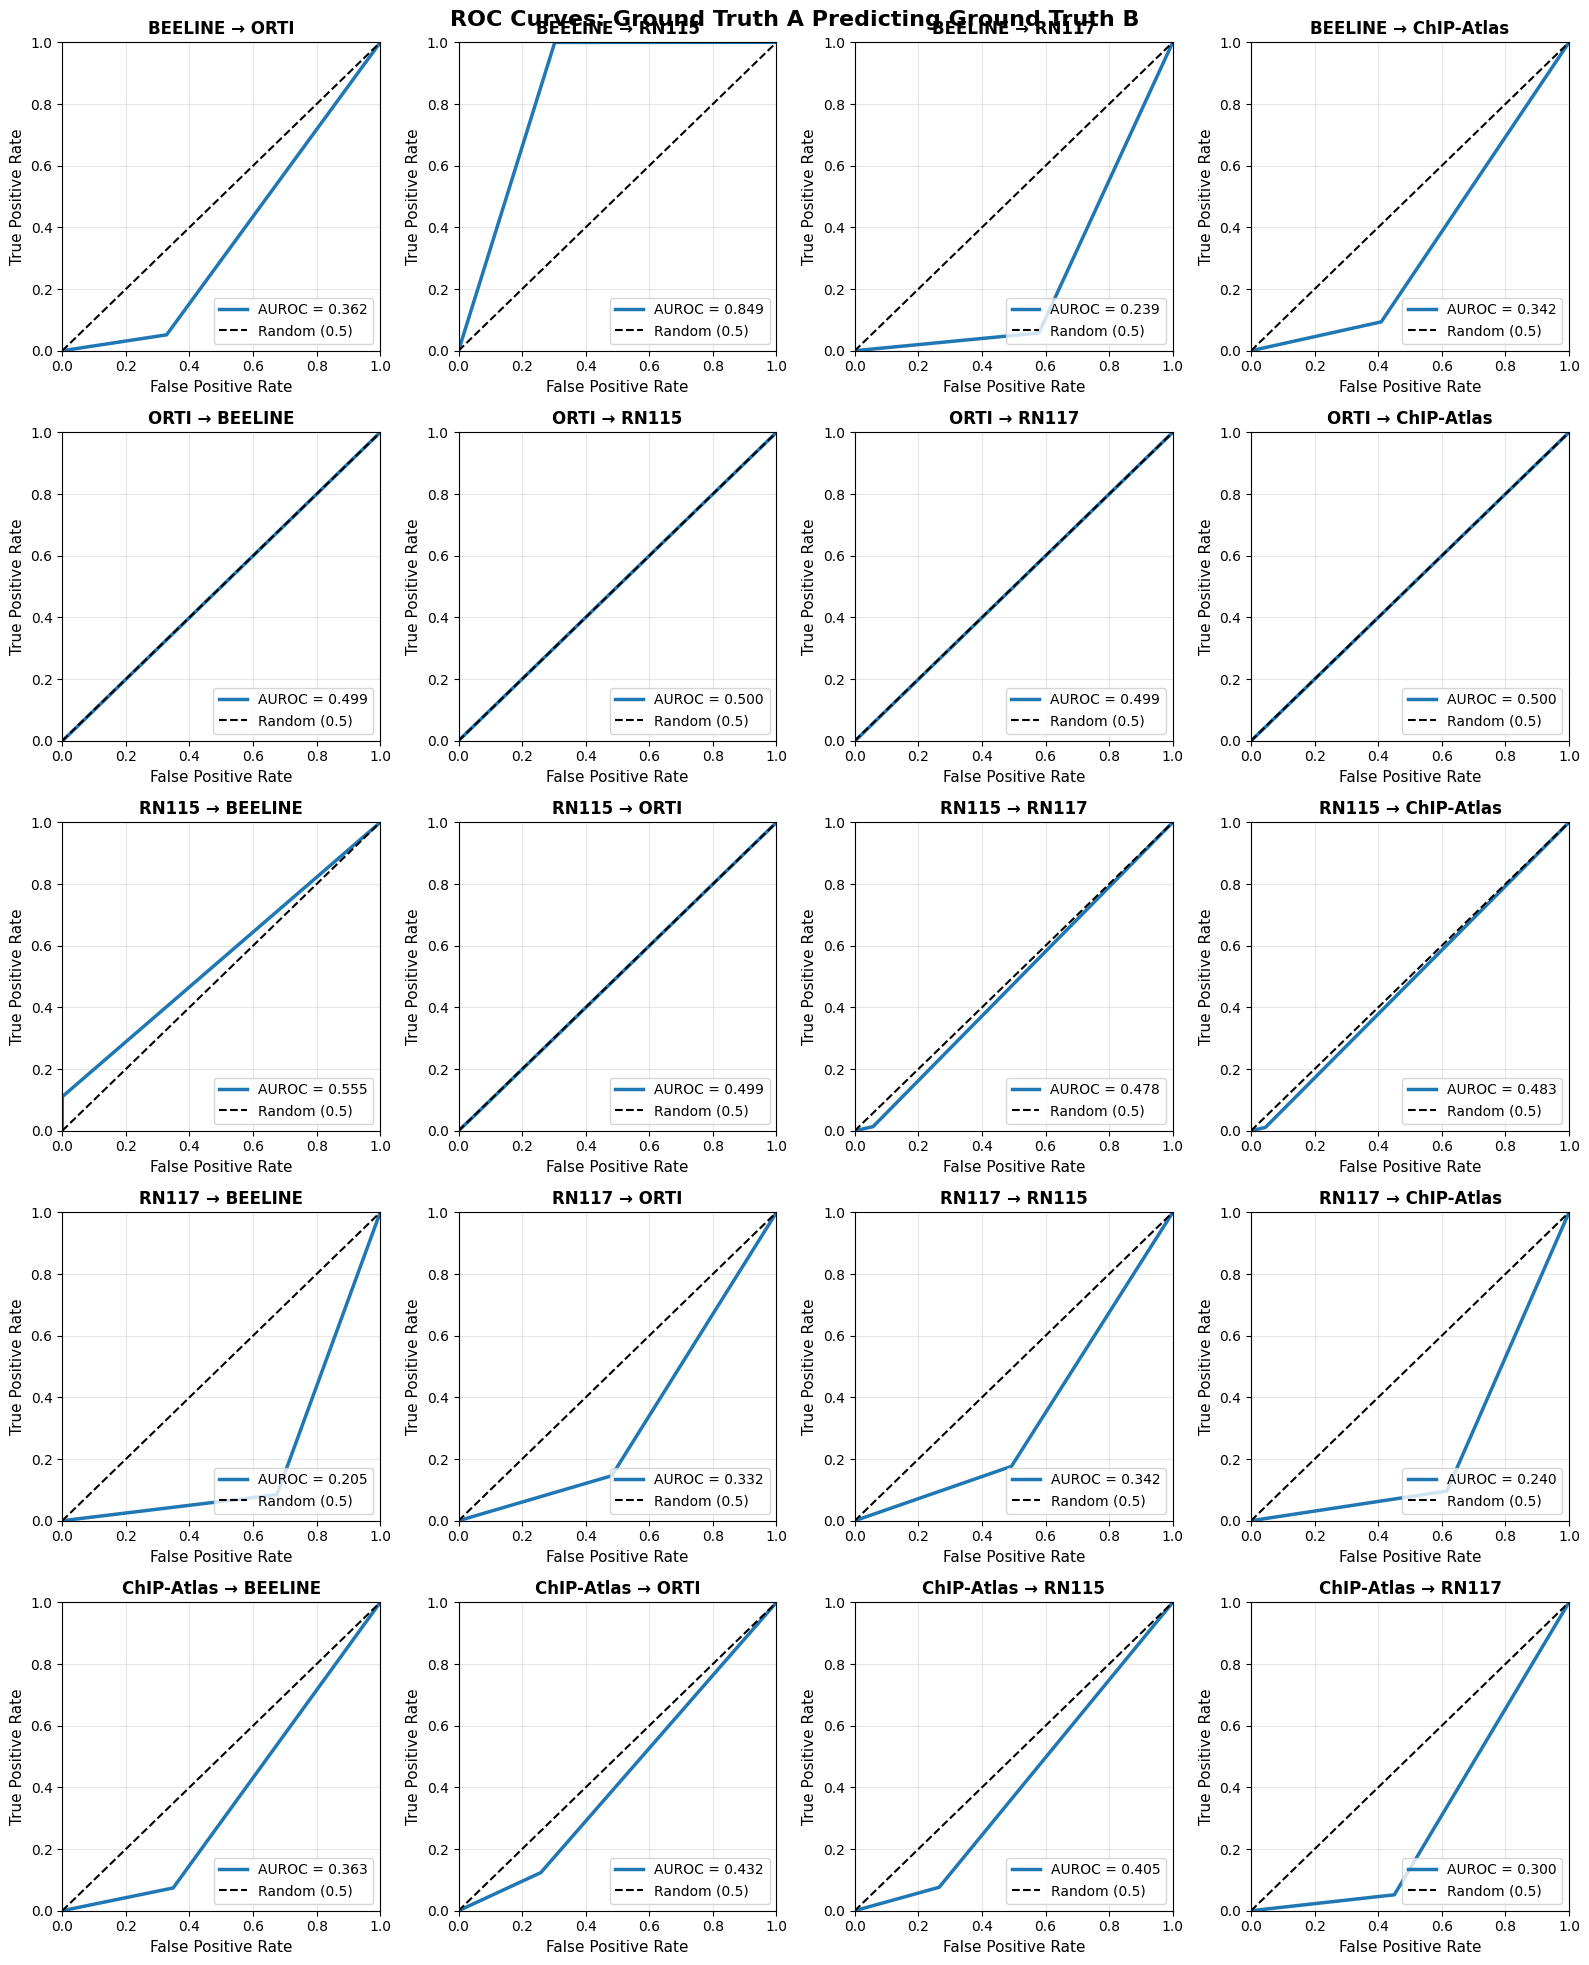

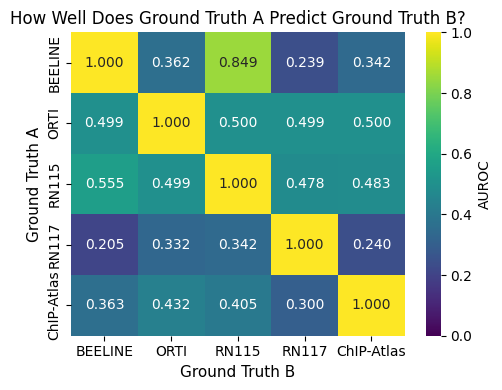


AUROC SUMMARY (sorted by performance)
BEELINE vs RN115              : 0.8486
RN115 vs BEELINE              : 0.5552
ORTI vs RN115                 : 0.5000
ORTI vs ChIP-Atlas            : 0.4996
RN115 vs ORTI                 : 0.4994
ORTI vs BEELINE               : 0.4994
ORTI vs RN117                 : 0.4993
RN115 vs ChIP-Atlas           : 0.4828
RN115 vs RN117                : 0.4779
ChIP-Atlas vs ORTI            : 0.4324
ChIP-Atlas vs RN115           : 0.4053
ChIP-Atlas vs BEELINE         : 0.3626
BEELINE vs ORTI               : 0.3617
BEELINE vs ChIP-Atlas         : 0.3420
RN117 vs RN115                : 0.3418
RN117 vs ORTI                 : 0.3320
ChIP-Atlas vs RN117           : 0.3005
RN117 vs ChIP-Atlas           : 0.2402
BEELINE vs RN117              : 0.2394
RN117 vs BEELINE              : 0.2047


In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get all unique TF-TG pairs across all datasets (universe of possible edges)
all_possible_edges = set()
for edge_set in datasets.values():
    all_possible_edges.update(edge_set)

print(f"Total unique edges across all datasets: {len(all_possible_edges):,}")

# Compute AUROC for each pair
auroc_results = {}
roc_curves = {}

for name_A in dataset_names:
    for name_B in dataset_names:
        if name_A == name_B:
            continue  # Skip self-comparison
        
        edges_A = datasets[name_A]
        edges_B = datasets[name_B]
        
        # Create score and label arrays
        scores = []
        labels = []
        
        for edge in all_possible_edges:
            # Score: 1 if in dataset A, 0 otherwise
            score = 1 if edge in edges_A else 0
            scores.append(score)
            
            # Label: 1 if in dataset B (ground truth), 0 otherwise
            label = 1 if edge in edges_B else 0
            labels.append(label)
        
        scores = np.array(scores)
        labels = np.array(labels)
        
        # Compute ROC curve and AUROC
        fpr, tpr, thresholds = roc_curve(labels, scores)
        auroc = auc(fpr, tpr)
        
        pair_key = f"{name_A} vs {name_B}"
        auroc_results[pair_key] = auroc
        roc_curves[pair_key] = (fpr, tpr)
        
        # Print statistics
        tp = np.sum((scores == 1) & (labels == 1))  # In both A and B
        fp = np.sum((scores == 1) & (labels == 0))  # In A but not B
        fn = np.sum((scores == 0) & (labels == 1))  # In B but not A
        tn = np.sum((scores == 0) & (labels == 0))  # In neither
        
        print(f"\n{pair_key}:")
        print(f"  AUROC: {auroc:.4f}")
        print(f"  TP: {tp:,} | FP: {fp:,} | FN: {fn:,} | TN: {tn:,}")
        print(f"  Precision: {tp/(tp+fp):.4f} | Recall: {tp/(tp+fn):.4f}")

# Create ROC curve plots
n_pairs = len(dataset_names) * (len(dataset_names) - 1)
n_cols = len(dataset_names) - 1
n_rows = len(dataset_names)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))
fig.suptitle('ROC Curves: Ground Truth A Predicting Ground Truth B', 
             fontsize=16, fontweight='bold')

plot_idx = 0
for i, name_A in enumerate(dataset_names):
    for j, name_B in enumerate(dataset_names):
        if name_A == name_B:
            continue
        
        row = i
        col = j if j < i else j - 1
        ax = axes[row, col] if n_rows > 1 else axes[col]
        
        pair_key = f"{name_A} vs {name_B}"
        fpr, tpr = roc_curves[pair_key]
        auroc = auroc_results[pair_key]
        
        # Plot ROC curve
        ax.plot(fpr, tpr, linewidth=2.5, label=f'AUROC = {auroc:.3f}')
        ax.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random (0.5)')
        
        ax.set_xlabel('False Positive Rate', fontsize=11)
        ax.set_ylabel('True Positive Rate', fontsize=11)
        ax.set_title(f'{name_A} → {name_B}', fontsize=12, fontweight='bold')
        ax.legend(loc='lower right', fontsize=10)
        ax.grid(alpha=0.3)
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()

# Create summary heatmap of AUROC values
auroc_matrix = np.zeros((len(dataset_names), len(dataset_names)))
for i, name_A in enumerate(dataset_names):
    for j, name_B in enumerate(dataset_names):
        if name_A == name_B:
            auroc_matrix[i, j] = 1.0  # Perfect prediction of itself
        else:
            pair_key = f"{name_A} vs {name_B}"
            auroc_matrix[i, j] = auroc_results[pair_key]

fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(auroc_matrix, annot=True, fmt='.3f', cmap='viridis', 
            xticklabels=dataset_names, yticklabels=dataset_names,
            vmin=0.0, vmax=1.0, center=0.5, 
            cbar_kws={'label': 'AUROC'}, ax=ax)
ax.set_xlabel('Ground Truth B', fontsize=11)
ax.set_ylabel('Ground Truth A', fontsize=11)
ax.set_title('How Well Does Ground Truth A Predict Ground Truth B?', 
             fontsize=12)
plt.tight_layout()
plt.show()

# Print sorted AUROC results
print("\n" + "="*80)
print("AUROC SUMMARY (sorted by performance)")
print("="*80)
sorted_auroc = sorted(auroc_results.items(), key=lambda x: x[1], reverse=True)
for pair, auroc_val in sorted_auroc:
    print(f"{pair:30s}: {auroc_val:.4f}")


BEELINE vs ORTI:
  Common TFs: 43 | Common TGs: 1,178
  Universe size (TF×TG): 50,654
  AUROC: 0.5350
  TP: 156 | FP: 11,443 | FN: 367 | TN: 38,688
  Precision: 0.0134 | Recall: 0.2983

BEELINE vs RN115:
  Common TFs: 47 | Common TGs: 21,223
  Universe size (TF×TG): 997,481
  AUROC: 0.9451
  TP: 107,961 | FP: 97,676 | FN: 0 | TN: 791,844
  Precision: 0.5250 | Recall: 1.0000

BEELINE vs RN117:
  Common TFs: 30 | Common TGs: 15,331
  Universe size (TF×TG): 459,930
  AUROC: 0.5465
  TP: 82,546 | FP: 52,531 | FN: 162,244 | TN: 162,609
  Precision: 0.6111 | Recall: 0.3372

BEELINE vs ChIP-Atlas:
  Common TFs: 40 | Common TGs: 18,634
  Universe size (TF×TG): 745,360
  AUROC: 0.5580
  TP: 72,204 | FP: 149,523 | FN: 115,704 | TN: 407,929
  Precision: 0.3256 | Recall: 0.3843

ORTI vs BEELINE:
  Common TFs: 43 | Common TGs: 1,178
  Universe size (TF×TG): 50,654
  AUROC: 0.5020
  TP: 156 | FP: 367 | FN: 11,443 | TN: 38,688
  Precision: 0.2983 | Recall: 0.0134

ORTI vs RN115:
  Common TFs: 20 | C

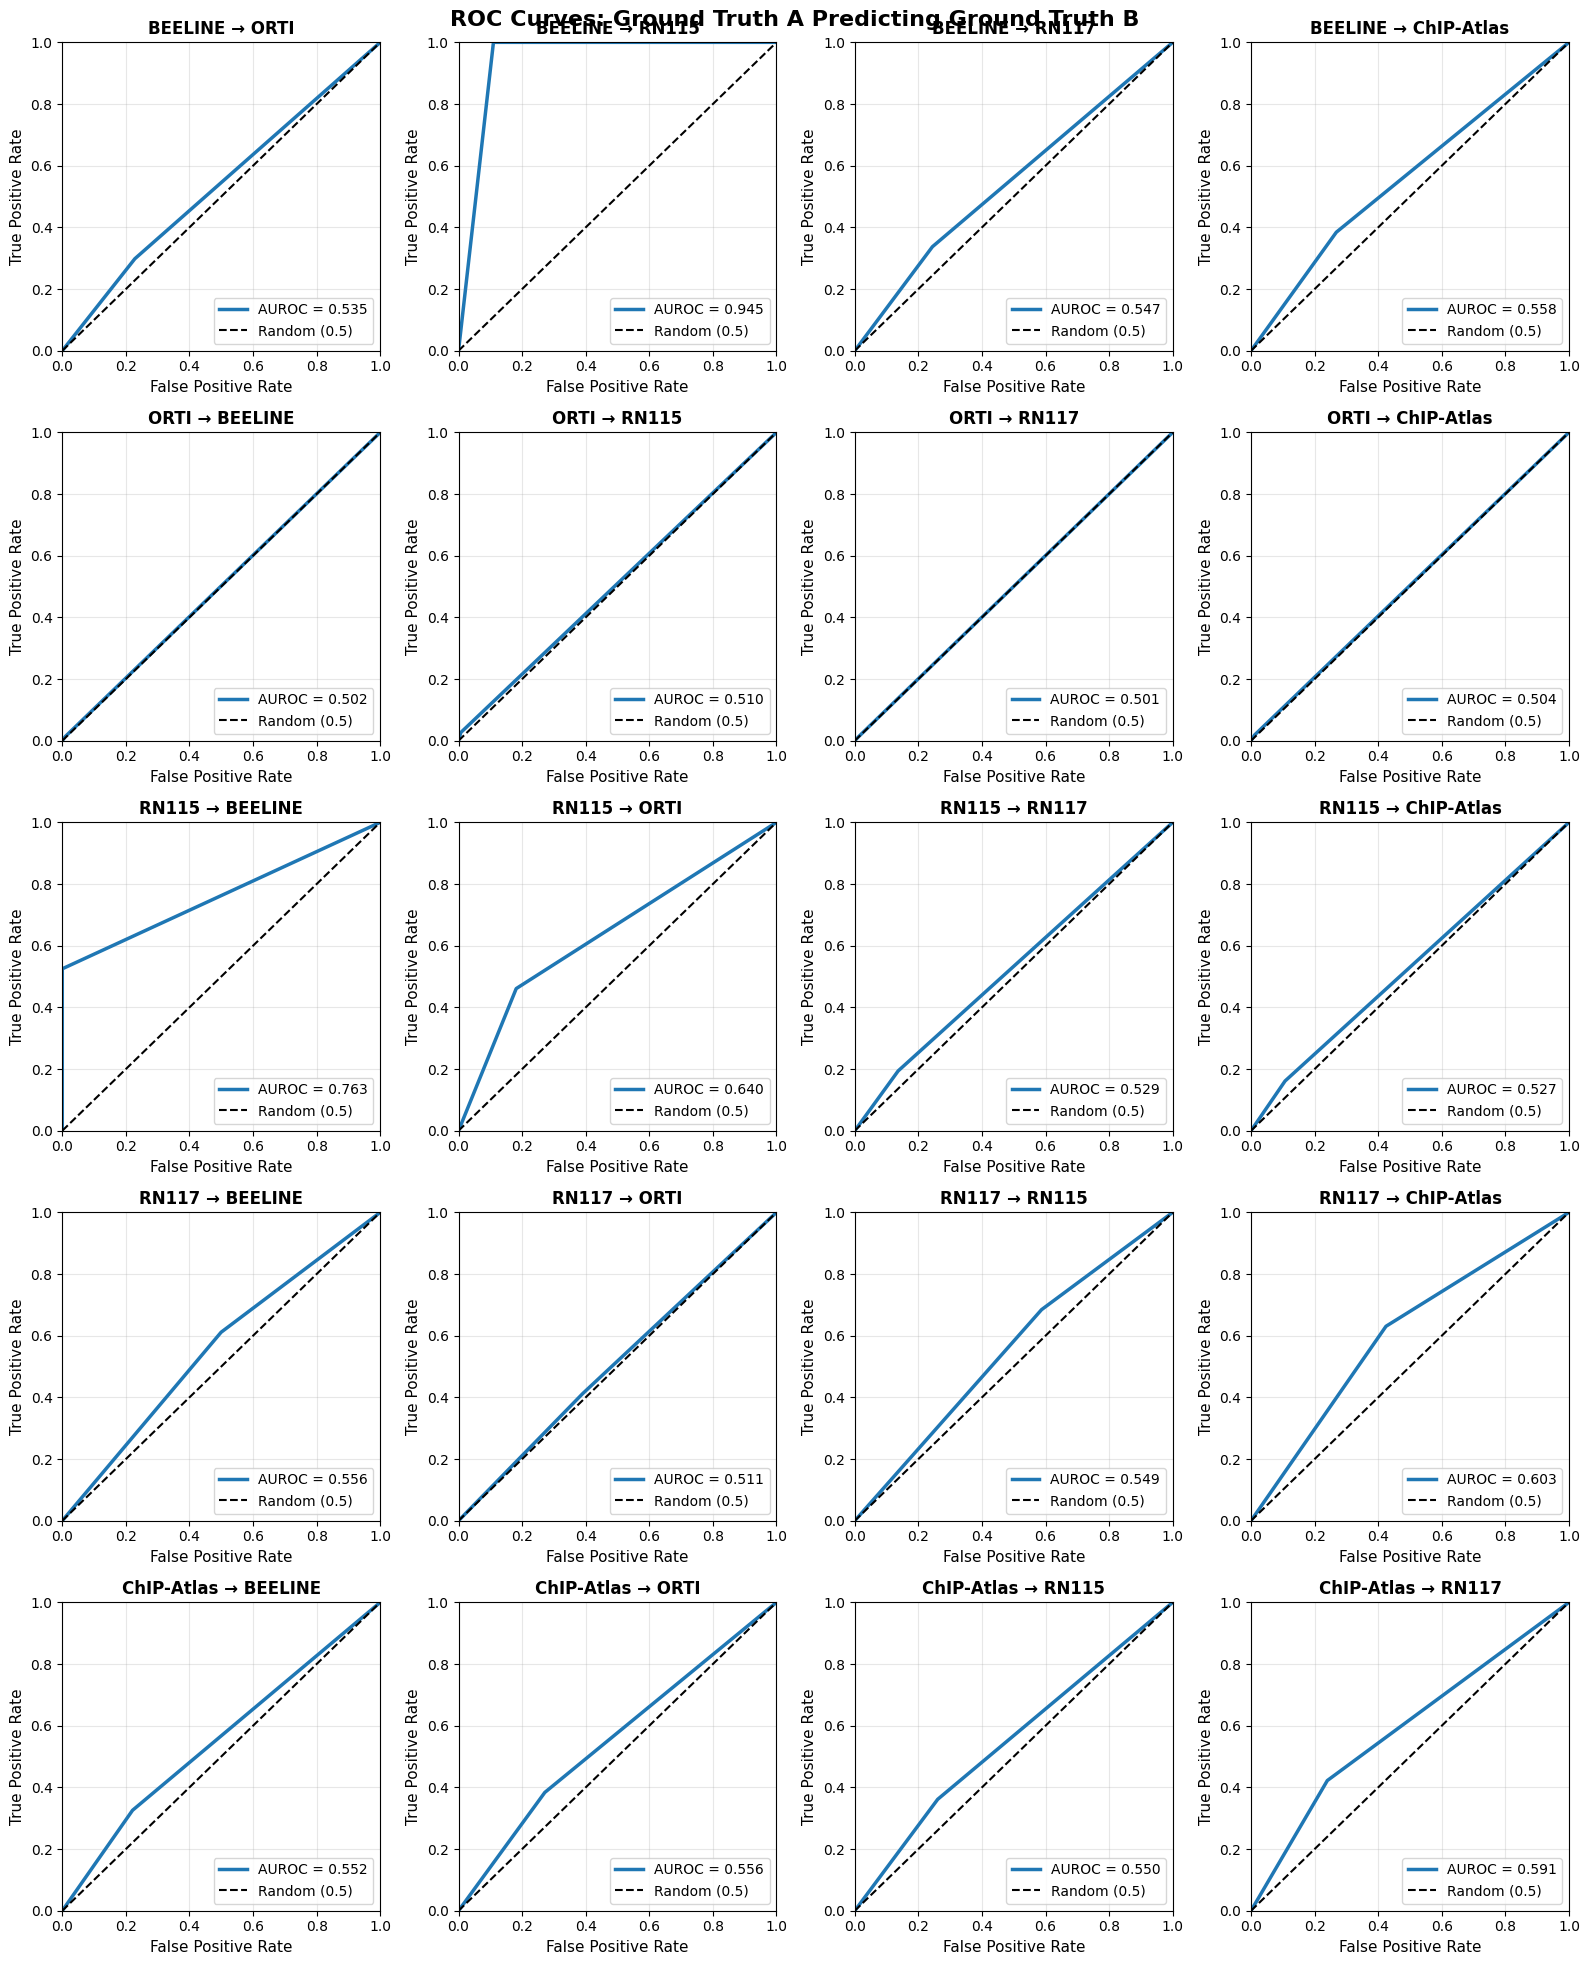

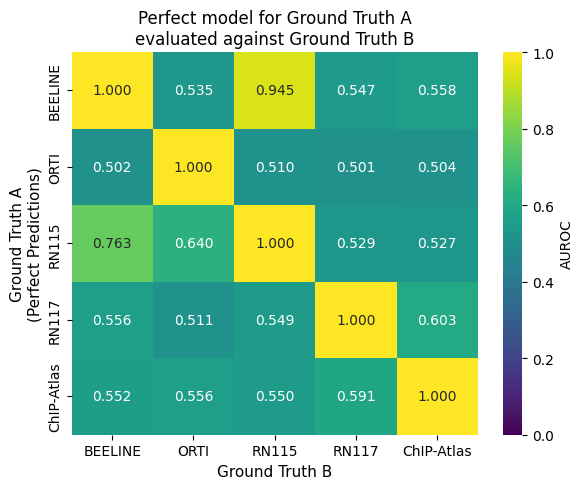


AUROC SUMMARY (sorted by performance)
BEELINE vs RN115              : 0.9451
RN115 vs BEELINE              : 0.7625
RN115 vs ORTI                 : 0.6397
RN117 vs ChIP-Atlas           : 0.6030
ChIP-Atlas vs RN117           : 0.5911
BEELINE vs ChIP-Atlas         : 0.5580
ChIP-Atlas vs ORTI            : 0.5561
RN117 vs BEELINE              : 0.5558
ChIP-Atlas vs BEELINE         : 0.5523
ChIP-Atlas vs RN115           : 0.5502
RN117 vs RN115                : 0.5485
BEELINE vs RN117              : 0.5465
BEELINE vs ORTI               : 0.5350
RN115 vs RN117                : 0.5288
RN115 vs ChIP-Atlas           : 0.5271
RN117 vs ORTI                 : 0.5108
ORTI vs RN115                 : 0.5097
ORTI vs ChIP-Atlas            : 0.5037
ORTI vs BEELINE               : 0.5020
ORTI vs RN117                 : 0.5006


In [62]:
from itertools import product
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# ============================================================
# Build pair-specific universes and compute AUROC
# ============================================================

auroc_results = {}
roc_curves = {}

for name_A in dataset_names:
    for name_B in dataset_names:
        if name_A == name_B:
            continue  # Skip self-comparison

        edges_A = datasets[name_A]  # set of (TF, TG)
        edges_B = datasets[name_B]

        # ---- 1) Subset so both see same TF and TG universe ----
        tfs_A = {tf for tf, tg in edges_A}
        tfs_B = {tf for tf, tg in edges_B}
        tgs_A = {tg for tf, tg in edges_A}
        tgs_B = {tg for tf, tg in edges_B}

        common_tfs = tfs_A & tfs_B
        common_tgs = tgs_A & tgs_B

        if not common_tfs or not common_tgs:
            # No overlapping TFs/TGs → AUROC undefined / NaN
            pair_key = f"{name_A} vs {name_B}"
            auroc_results[pair_key] = np.nan
            roc_curves[pair_key] = (np.array([0, 1]), np.array([0, 1]))
            print(f"\n{pair_key}: no common TF/TG, skipping.")
            continue

        # Restrict edges to common TF/TG universe (optional but nice for debug)
        edges_A_sub = {e for e in edges_A if e[0] in common_tfs and e[1] in common_tgs}
        edges_B_sub = {e for e in edges_B if e[0] in common_tfs and e[1] in common_tgs}

        # ---- 2–3) Build scores (from A) and labels (from B) over ALL TF×TG in the subset ----
        scores = []
        labels = []

        # All potential TF–TG combinations in this shared universe
        for tf, tg in product(common_tfs, common_tgs):
            edge = (tf, tg)

            # Score: 1 if edge in dataset A, else 0
            scores.append(1 if edge in edges_A_sub else 0)

            # Label: 1 if edge in dataset B, else 0
            labels.append(1 if edge in edges_B_sub else 0)

        scores = np.array(scores, dtype=float)
        labels = np.array(labels, dtype=int)

        # ---- 4) ROC curve and AUROC ----
        # Handle degenerate cases where labels are all 0 or all 1
        if np.unique(labels).size < 2:
            fpr = np.array([0.0, 1.0])
            tpr = np.array([0.0, 1.0])
            auroc = np.nan
        else:
            fpr, tpr, thresholds = roc_curve(labels, scores)
            auroc = auc(fpr, tpr)

        pair_key = f"{name_A} vs {name_B}"
        auroc_results[pair_key] = auroc
        roc_curves[pair_key] = (fpr, tpr)

        # Some basic stats in this pair-specific universe
        tp = np.sum((scores == 1) & (labels == 1))  # in A and B
        fp = np.sum((scores == 1) & (labels == 0))  # in A not in B
        fn = np.sum((scores == 0) & (labels == 1))  # in B not in A
        tn = np.sum((scores == 0) & (labels == 0))  # in neither

        prec = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        rec  = tp / (tp + fn) if (tp + fn) > 0 else 0.0

        print(f"\n{pair_key}:")
        print(f"  Common TFs: {len(common_tfs):,} | Common TGs: {len(common_tgs):,}")
        print(f"  Universe size (TF×TG): {len(common_tfs) * len(common_tgs):,}")
        print(f"  AUROC: {auroc:.4f}")
        print(f"  TP: {tp:,} | FP: {fp:,} | FN: {fn:,} | TN: {tn:,}")
        print(f"  Precision: {prec:.4f} | Recall: {rec:.4f}")


# ============================================================
# ROC curve grid (A → B)
# ============================================================

n_cols = len(dataset_names) - 1
n_rows = len(dataset_names)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
fig.suptitle('ROC Curves: Ground Truth A Predicting Ground Truth B',
             fontsize=16, fontweight='bold')

for i, name_A in enumerate(dataset_names):
    for j, name_B in enumerate(dataset_names):
        if name_A == name_B:
            continue

        row = i
        col = j if j < i else j - 1
        ax = axes[row, col] if n_rows > 1 else axes[col]

        pair_key = f"{name_A} vs {name_B}"
        fpr, tpr = roc_curves[pair_key]
        auroc = auroc_results[pair_key]

        ax.plot(fpr, tpr, linewidth=2.5, label=f'AUROC = {auroc:.3f}')
        ax.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random (0.5)')

        ax.set_xlabel('False Positive Rate', fontsize=11)
        ax.set_ylabel('True Positive Rate', fontsize=11)
        ax.set_title(f'{name_A} → {name_B}', fontsize=12, fontweight='bold')
        ax.legend(loc='lower right', fontsize=10)
        ax.grid(alpha=0.3)
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()


# ============================================================
# AUROC heatmap summary (A predicts B)
# ============================================================

auroc_matrix = np.zeros((len(dataset_names), len(dataset_names)))
for i, name_A in enumerate(dataset_names):
    for j, name_B in enumerate(dataset_names):
        if name_A == name_B:
            auroc_matrix[i, j] = 1.0  # perfect by definition
        else:
            pair_key = f"{name_A} vs {name_B}"
            auroc_matrix[i, j] = auroc_results.get(pair_key, np.nan)

fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(
    auroc_matrix,
    annot=True,
    fmt='.3f',
    cmap='viridis',
    xticklabels=dataset_names,
    yticklabels=dataset_names,
    vmin=0.0,
    vmax=1.0,
    center=0.5,
    cbar_kws={'label': 'AUROC'},
    ax=ax
)
ax.set_xlabel('Ground Truth B', fontsize=11)
ax.set_ylabel('Ground Truth A\n(Perfect Predictions)', fontsize=11)
ax.set_title('Perfect model for Ground Truth A\nevaluated against Ground Truth B',
             fontsize=12)
plt.tight_layout()
plt.show()


# ============================================================
# Sorted AUROC summary
# ============================================================

print("\n" + "=" * 80)
print("AUROC SUMMARY (sorted by performance)")
print("=" * 80)
sorted_auroc = sorted(
    auroc_results.items(),
    key=lambda x: (np.nan_to_num(x[1], nan=-1.0)),
    reverse=True
)
for pair, auroc_val in sorted_auroc:
    print(f"{pair:30s}: {auroc_val:.4f}")
